In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/My colab notebooks/Data Mining/Final project/Dataset/lc_loan.csv")
df.head()

<ipython-input-10-0ab4f9a15374>:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/My colab notebooks/Data Mining/Final project/Dataset/lc_loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Increase the maximum width for displaying string columns
pd.set_option('display.max_colwidth', 100)

In [ ]:
#load the data dictionary
df_dict = pd.read_excel("/content/drive/MyDrive/My colab notebooks/Data Mining/Final project/Dataset/LCDataDictionary.xlsx")
df_dict.head(100)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
...,...,...
95,title,The loan title provided by the borrower
96,tot_coll_amt,Total collection amounts ever owed
97,tot_cur_bal,Total current balance of all accounts
98,tot_hi_cred_lim,Total high credit/credit limit


In [ ]:
df.shape

(887379, 74)

In [ ]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


# Dropping rows with high number of null values(>70%)

In [ ]:
missing_percent=df.isnull().sum(axis=0)*100/len(df)#, columns=['Column name','null_percent'])

In [ ]:
missing_percent

id                   0.000000
member_id            0.000000
loan_amnt            0.000000
funded_amnt          0.000000
funded_amnt_inv      0.000000
                      ...    
all_util            97.591559
total_rev_hi_lim     7.919502
inq_fi              97.591559
total_cu_tl         97.591559
inq_last_12m        97.591559
Length: 74, dtype: float64

In [ ]:
# Extract column names with more than 70% null values
high_null_columns= missing_percent[missing_percent > 70].index.tolist()
high_null_columns

['desc',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [ ]:
# dropping columns with more than 80% null values
df.drop(columns=high_null_columns, inplace=True)

In [ ]:
df.shape

(887379, 54)

we have dropped 20 columns from the original dataframe

In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

# Dropping columns that indicate the features collected after loan is issued

For this problem, we will assume that our model will run at the moment one begins to apply for the loan. Thus, there should be no information about user's payment behaviors for the loan

In [ ]:
cols=['funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'out_prncp',
                'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
                'policy_code', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
                'collection_recovery_fee', 'last_pymnt_d', 	'next_pymnt_d',	'last_pymnt_amnt',
                'last_credit_pull_d', 'zip_code','member_id', 'id', 'url']

In [ ]:
len(cols)

21

In [ ]:
# id — randomly generated field by LendingClub for unique identification purposes only.
# member_id — randomly generated field by LendingClub for identification purposes only.
# funded_amnt — leaks information from the future
# funded_amnt_inv — leaks data from the future.
# sub_grade — contains redundant information that is already in the grade column
# int_rate — also included within the grade column.
# emp_title — requires other data and a lot of processing to become potentially useful
# issued_d — leaks data from the future.But we will keep it for calculating credit length later

In [ ]:
# zip_code – mostly redundant with the addr_state column since only the first 3 digits of the 5 digit zip code are visible.
# out_prncp – leaks data from the future.
# out_prncp_inv – also leaks data from the future.
# total_pymnt – also leaks data from the future.
# total_pymnt_inv – also leaks data from the future.
# total_rec_prncp
# total_rec_int
# total_rec_late_fee
# recoveries
# collection_recovery_fee
# last_pymnt_d
# last_pymnt_amnt

In [ ]:
df_dict.columns

Index(['LoanStatNew', 'Description'], dtype='object')

In [ ]:
# Increase the maximum width for displaying string columns
pd.set_option('display.max_colwidth', 100)

In [ ]:
df_dict[df_dict['LoanStatNew'].isin(cols)]

,LoanStatNew,Description
11,collection_recovery_fee,post charge off collection fee
23,funded_amnt,The total amount committed to that loan at that point in time.
24,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
27,id,A unique LC assigned ID for the loan listing.
36,last_credit_pull_d,The most recent month LC pulled credit for this loan
39,last_pymnt_amnt,Last total payment amount received
40,last_pymnt_d,Last month payment was received
44,member_id,A unique LC assigned Id for the borrower member.
58,next_pymnt_d,Next scheduled payment date
80,out_prncp,Remaining outstanding principal for total amount funded


In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [ ]:
df1=df.drop(columns=cols, axis=1)

In [ ]:
df1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,13648.0,83.7,9.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1687.0,9.4,4.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,2956.0,98.5,10.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,5598.0,21.0,37.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,27783.0,53.9,38.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN


Number of columns have come down to 32 now

In [ ]:
# id, member id, url are not useful for analysis
#df1.drop(['member_id', 'id', 'url'], axis=1, inplace=True)

Initial EDA

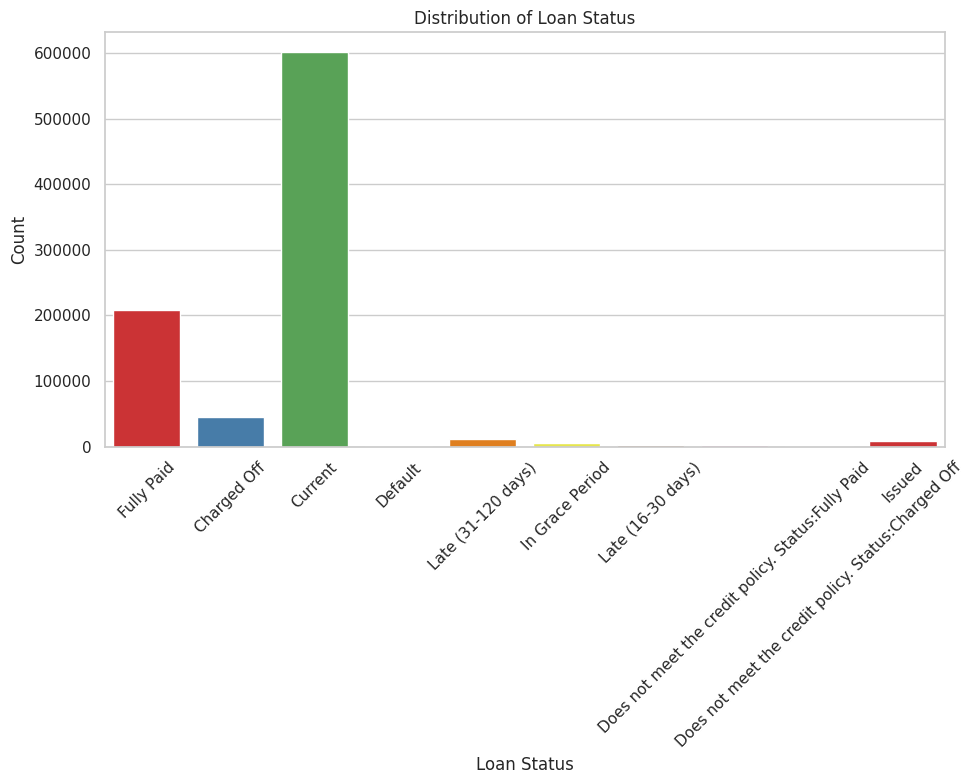

In [ ]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 8))
sns.countplot(x='loan_status', data=df1, palette='Set1')

# Add labels and title
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')

# Rotate x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

We can see that majority of the loan statuses are in the current category. but the fully paid and charged off are the 2 categories on which we will mainly focusing our analysis on.

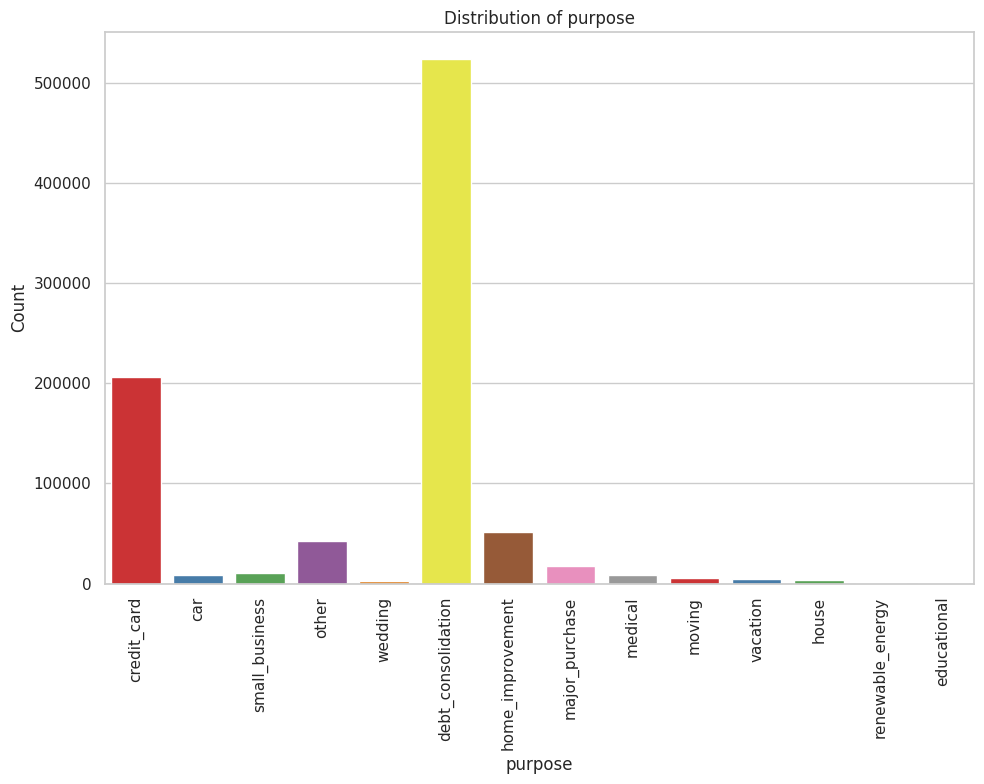

In [ ]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 8))
sns.countplot(x='purpose', data=df1, palette='Set1')

# Add labels and title
plt.xlabel('purpose')
plt.ylabel('Count')
plt.title('Distribution of purpose')

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

form the distribution of loan purpose we see that the majority of the borrowers, are taking loan for debt_consolidation followed by credit card.

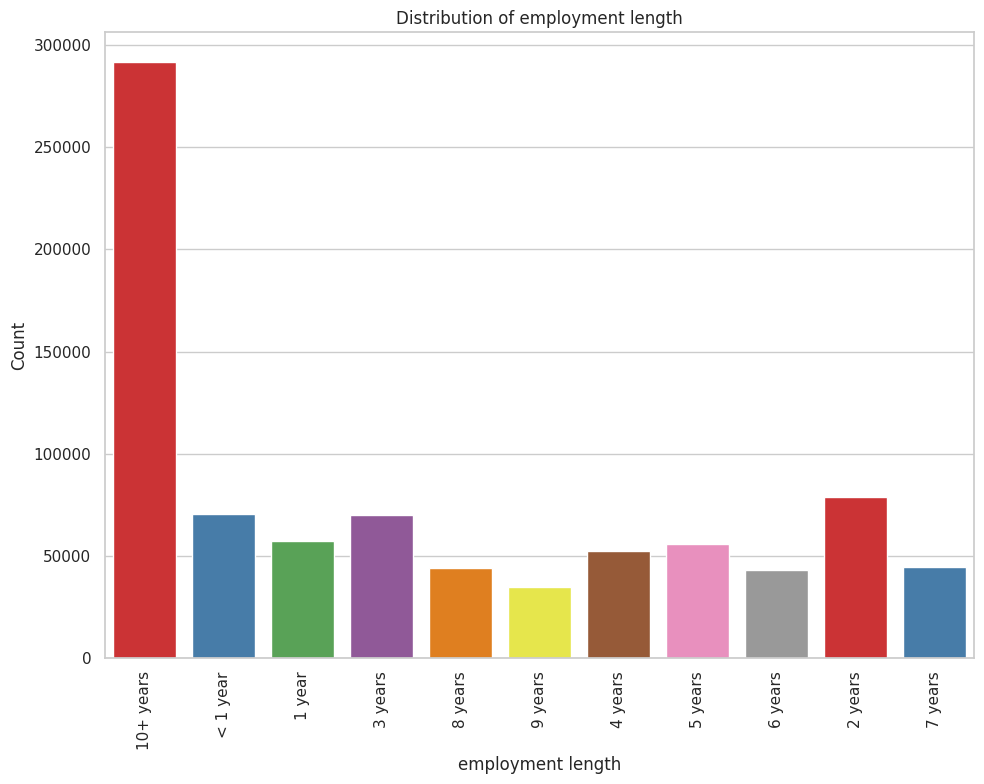

In [ ]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 8))
sns.countplot(x='emp_length', data=df1, palette='Set1')

# Add labels and title
plt.xlabel('employment length')
plt.ylabel('Count')
plt.title('Distribution of employment length')

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

majority of the borrowers have an employement length of more than 10 years.

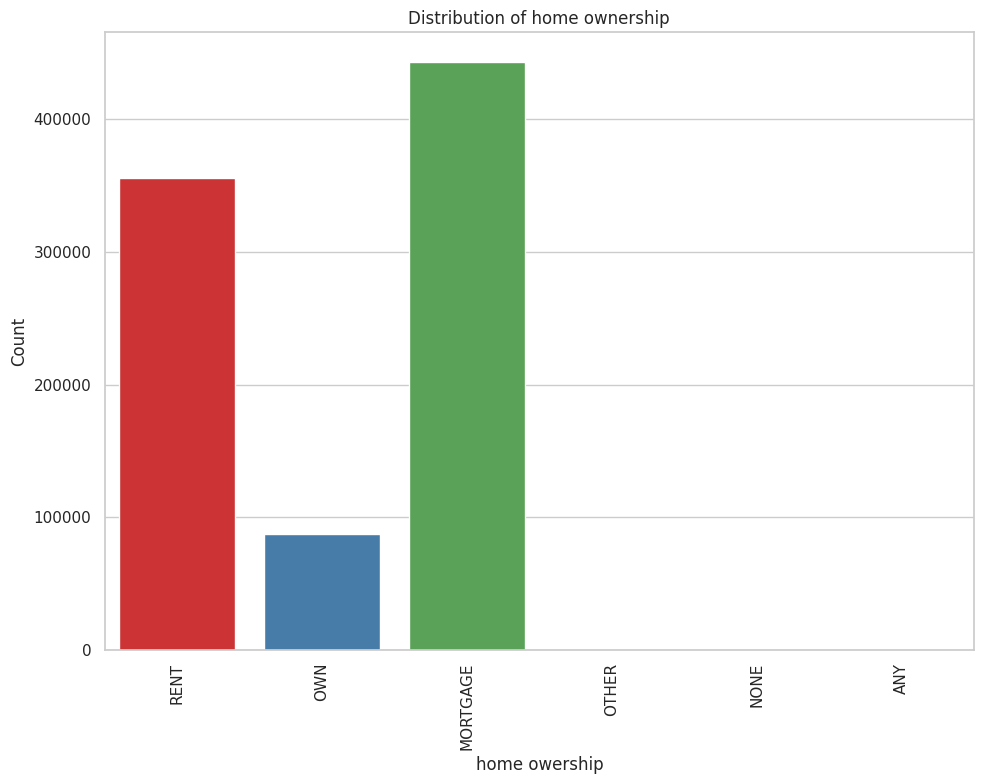

In [ ]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 8))
sns.countplot(x='home_ownership', data=df1, palette='Set1')

# Add labels and title
plt.xlabel('home owership')
plt.ylabel('Count')
plt.title('Distribution of home ownership')

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

majority of the borrowers either live in a rental/mortgaged house.

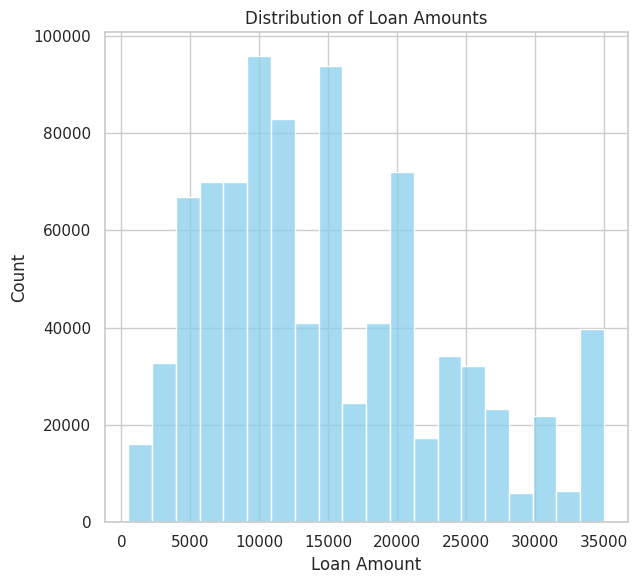

In [ ]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(12, 6))


# Plot a histogram (bar plot) for loan amount
plt.subplot(1, 2, 1)
sns.histplot(data=df1, x='loan_amnt', bins=20, kde=False, color='skyblue')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amounts')



# Show the plot
plt.tight_layout()
plt.show()

Distribution of loan amount for each purpose:

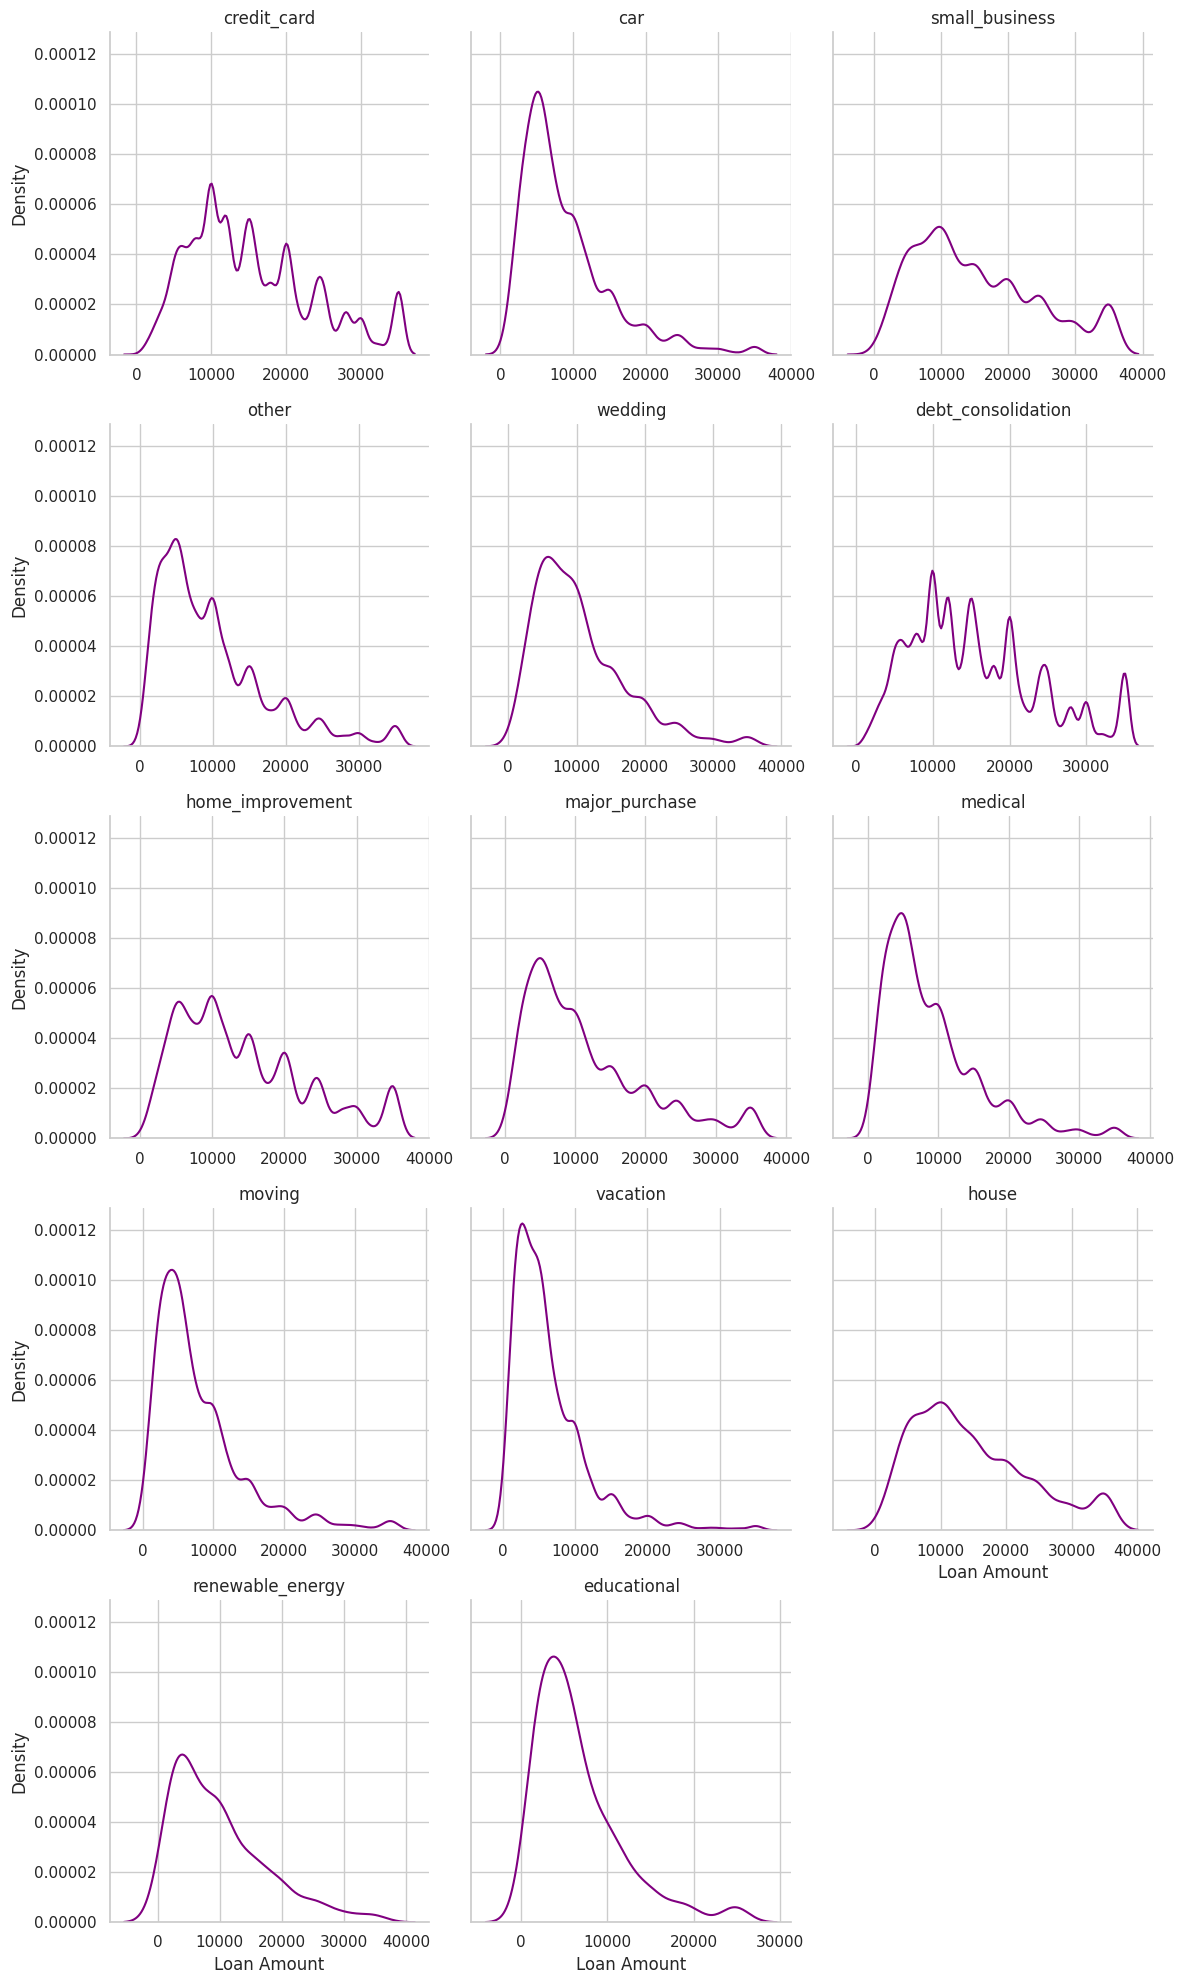

In [ ]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a FacetGrid for the KDE plots
g = sns.FacetGrid(df1, col="purpose", col_wrap=3, height=4, sharex=False)
g.map(sns.kdeplot, "loan_amnt", color='purple')

# Set labels and title
g.set_axis_labels("Loan Amount", "Density")
g.set_titles(col_template="{col_name}")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

From the above distribution curves of each loan purpose type we can say the amount borrowed for house, home_improvement, debt_consolidation, small_business and credit_card usual more when compared to the other categories.

Distribution of loan amount for each employment length:

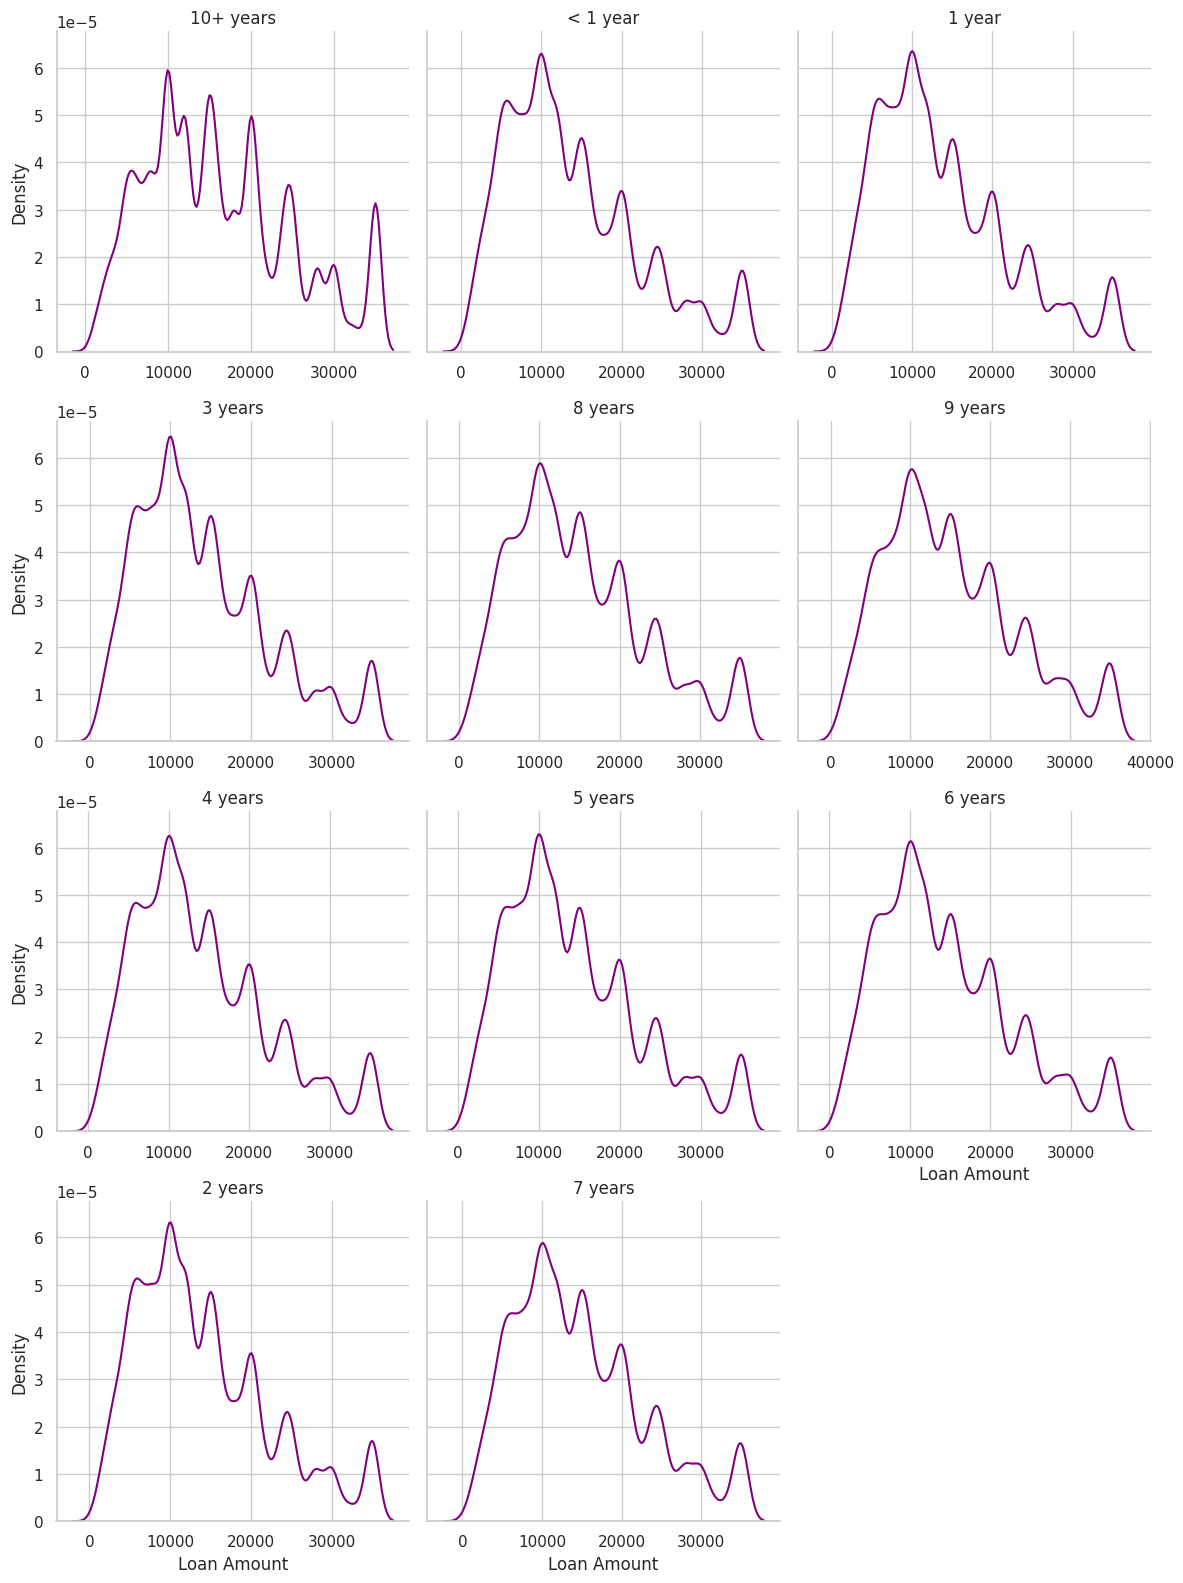

In [ ]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a FacetGrid for the KDE plots
g = sns.FacetGrid(df1, col="emp_length", col_wrap=3, height=4, sharex=False)
g.map(sns.kdeplot, "loan_amnt", color='purple')

# Set labels and title
g.set_axis_labels("Loan Amount", "Density")
g.set_titles(col_template="{col_name}")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

from the above distribution curves, we see that the distribution of loan amount for each employment length are similar.

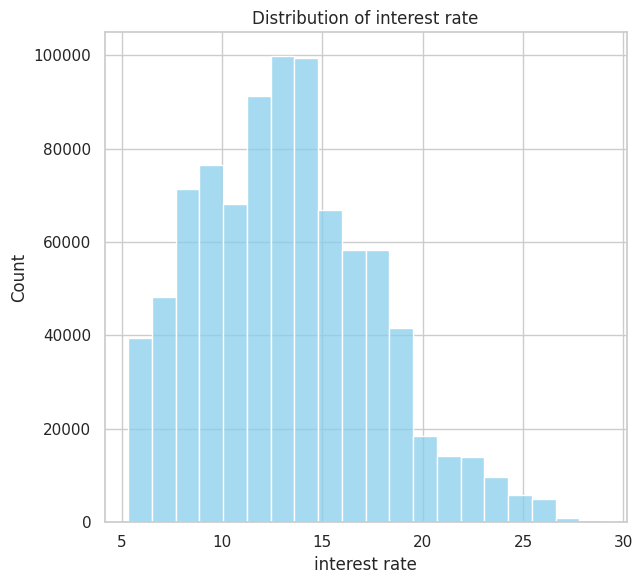

In [ ]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(12, 6))


# Plot a histogram (bar plot) for interest rate
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='int_rate', bins=20, kde=False, color='skyblue')
plt.xlabel('interest rate')
plt.ylabel('Count')
plt.title('Distribution of interest rate')



# Show the plot
plt.tight_layout()
plt.show()

Distribution of number of borrowers by location.

In [ ]:
import plotly.express as px

target_loan = ["Fully Paid"]
map_fp = df1[df1["loan_status"].isin(target_loan)]
m = map_fp[["addr_state", "loan_status"]]
m = m.groupby(["addr_state"])["loan_status"].agg('count').reset_index()

fig = px.choropleth(
    m,
    locations="addr_state",
    locationmode="USA-states",
    color="loan_status",
    color_continuous_scale="blues",
    range_color=(0, m["loan_status"].max()),
    labels={"loan_status": "Fully Paid Loans"},
    title="Fully Paid Loans",
    scope="usa",  # Limit the map scope to USA
)

fig.show()

In [ ]:
import plotly.express as px

target_loan = ["Charged Off"]
map_fp = df1[df1["loan_status"].isin(target_loan)]
m = map_fp[["addr_state", "loan_status"]]
m = m.groupby(["addr_state"])["loan_status"].agg('count').reset_index()

fig = px.choropleth(
    m,
    locations="addr_state",
    locationmode="USA-states",
    color="loan_status",
    color_continuous_scale="reds",
    range_color=(0, m["loan_status"].max()),
    labels={"loan_status": "Charged Off Loans"},
    title="Charged Off Loans",
    scope="usa",  # Limit the map scope to USA
)

fig.show()

Cleaning Target column - 'loan status'


In [ ]:
df1['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

For this project, we don't want to assume anything about the loans that are in Current status. It means, the loan is till being repaid by the borrower. So, we will remove those records in our data set. We will focus only on the loans that are defaulted or repaid. Here, we assume loan belongs to non-default buckets if it is fully paid, and default bucket if it is current status Charged Off, Default, or Late (16-30 days, or 31-120 days). For loans that are in Grace Period, issued we will remove them from our data due to uncertainty.

In [ ]:
df2=df1[~df1['loan_status'].isin(['Current','Issued','In Grace Period'])].reset_index(drop=True)

In [ ]:
df2.isnull().sum()*100/len(df2)

loan_amnt                      0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      5.581663
emp_length                     4.010159
home_ownership                 0.000000
annual_inc                     0.001477
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
purpose                        0.000000
title                          0.005537
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.010706
earliest_cr_line               0.010706
inq_last_6mths                 0.010706
mths_since_last_delinq        55.074256
open_acc                       0.010706
pub_rec                        0.010706
revol_bal                      0.000000
revol_util                     0.092659


In [ ]:
df2.shape #df2 is df1 with filtered target values

(270887, 33)

In [ ]:
df2['loan_status'].value_counts()/len(df2)

Fully Paid                                             0.766825
Charged Off                                            0.167036
Late (31-120 days)                                     0.042789
Late (16-30 days)                                      0.008701
Does not meet the credit policy. Status:Fully Paid     0.007339
Default                                                0.004500
Does not meet the credit policy. Status:Charged Off    0.002809
Name: loan_status, dtype: float64

In [ ]:
# creating a target column containing all 1's
# 1- default, 0-non-default

df2['loan_default']=1
#changing target values to 1 for 'fully paid' records only
df2.loc[df2['loan_status'].isin (['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']), 'loan_default']=0

In [ ]:
df2.loan_default.value_counts()

0    209711
1     61176
Name: loan_default, dtype: int64

In [ ]:
df2.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_default
0,5000.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,83.7,9.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
1,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,9.4,4.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
2,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,98.5,10.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
3,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,21.0,37.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
4,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,28.3,12.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0


In [ ]:
#check for null values - before dropping issued and current loans
# df1.isnull().sum(axis=0)*100/len(df1)

Further EDA using simplified loan status

Text(0.5, 1.0, 'Distribution of Loan Status vs emp_length')

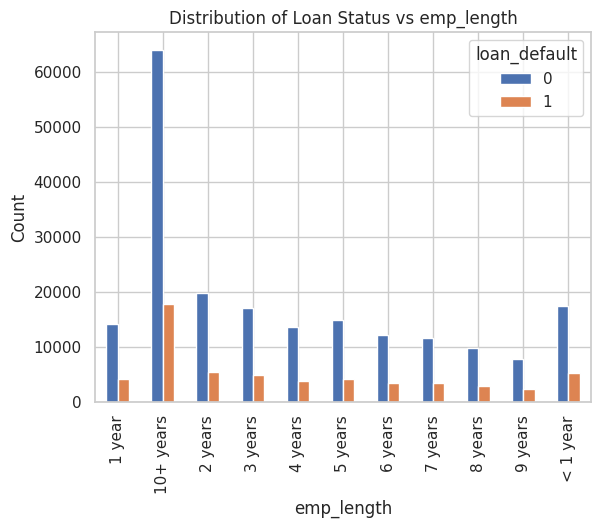

In [ ]:
el_loan_status_counts = df2.groupby(['emp_length', 'loan_default']).size().reset_index(name='count')
pivot_df = el_loan_status_counts.pivot(index='emp_length', columns='loan_default', values='count')

# Create a grouped bar chart to visualize the data
pivot_df.plot.bar()
plt.xlabel('emp_length')
plt.ylabel('Count')
plt.title('Distribution of Loan Status vs emp_length')

From the above plot we see that people employed for more than 10 years are highest number of people who have fully repaid their debt but similarly the people of this category are also the highest number of defaulters.

Text(0.5, 1.0, 'Distribution of Loan Status vs purpose')

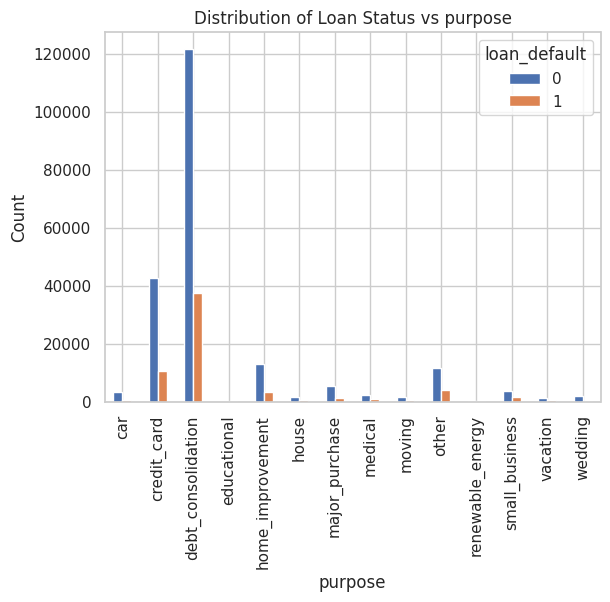

In [ ]:
el_loan_status_counts = df2.groupby(['purpose', 'loan_default']).size().reset_index(name='count')
pivot_df = el_loan_status_counts.pivot(index='purpose', columns='loan_default', values='count')

# Create a grouped bar chart to visualize the data
pivot_df.plot.bar()
plt.xlabel('purpose')
plt.ylabel('Count')
plt.title('Distribution of Loan Status vs purpose')

From the above plot we see that the purpose debt_consolidation has the highest number of people who have fully repaid their debt followed by credit_card but similarly the people of this category are also the highest number of defaulters.

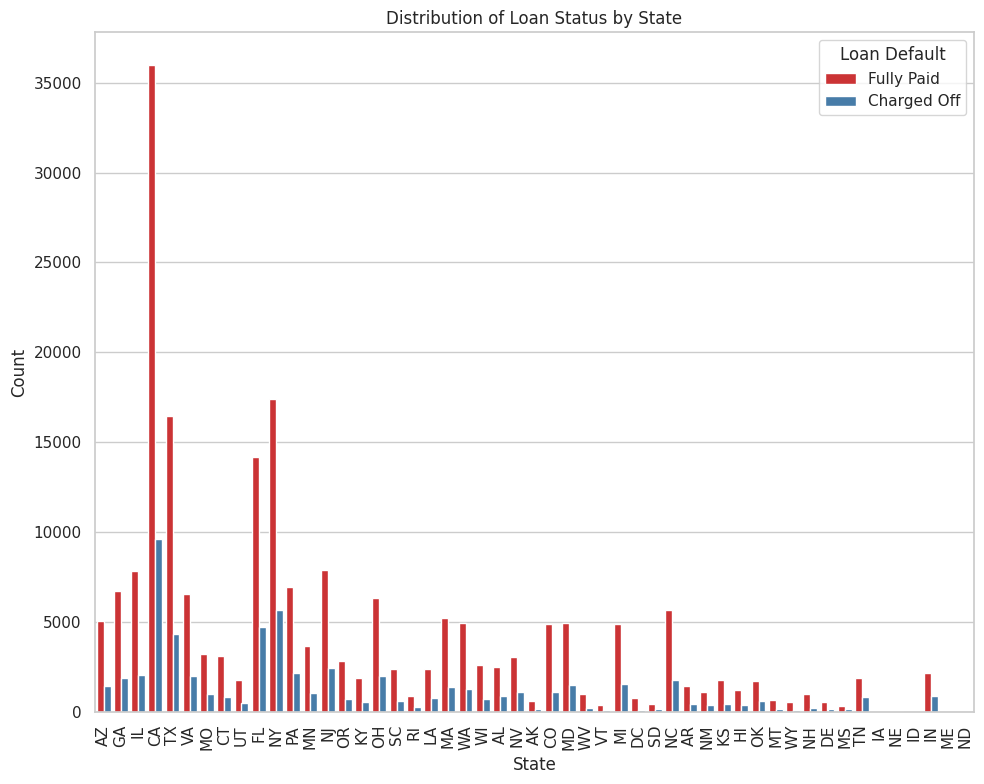

In [ ]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 8))
sns.countplot(x='addr_state', hue='loan_default', data=df2, palette='Set1')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Loan Status by State')

# Customize legend
plt.legend(title='Loan Default', labels=['Fully Paid', 'Charged Off'])

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

the states of CA, TX, NY, FL have high number of borrowers who have fully repaid their loans but they similarly high number of people who have defaulted, hence it will difficult find a pattern based on loaction.

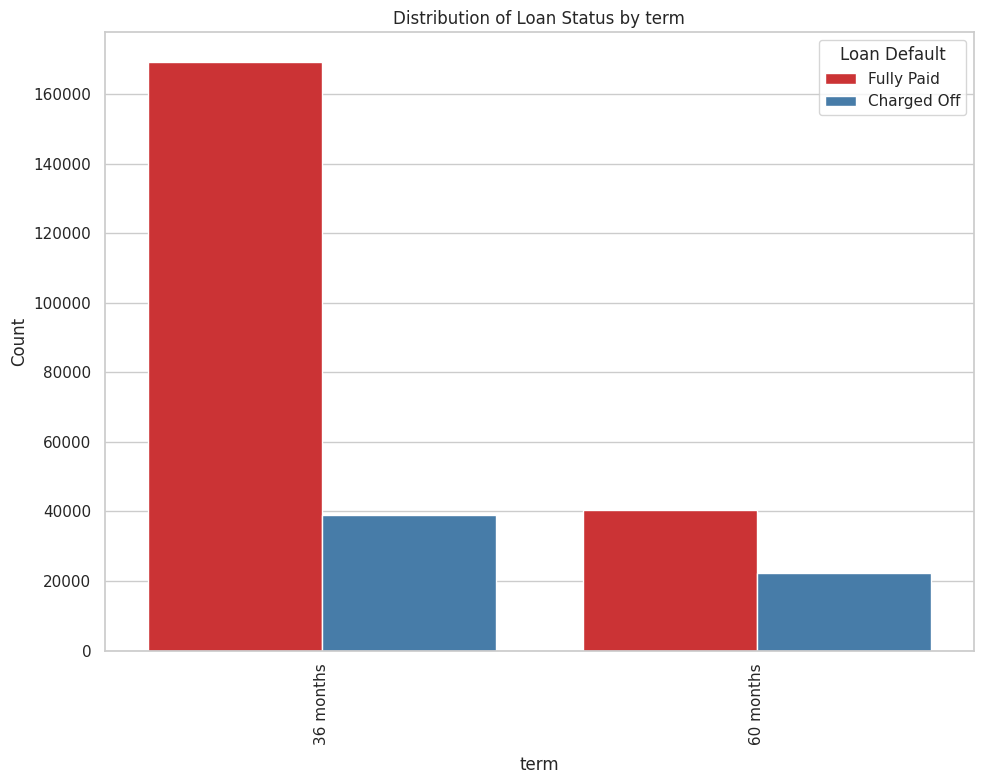

In [ ]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 8))
sns.countplot(x='term', hue='loan_default', data=df2, palette='Set1')

# Add labels and title
plt.xlabel('term')
plt.ylabel('Count')
plt.title('Distribution of Loan Status by term')

# Customize legend
plt.legend(title='Loan Default', labels=['Fully Paid', 'Charged Off'])

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

from the above pllot we can that higher number people borrow for 36 month period, and not only that we see that ratio of fully paid/ charged off for 36 month period is more than 60 month period. hence we might say that people borrowing for 60 month period have higher chance of defaulting.

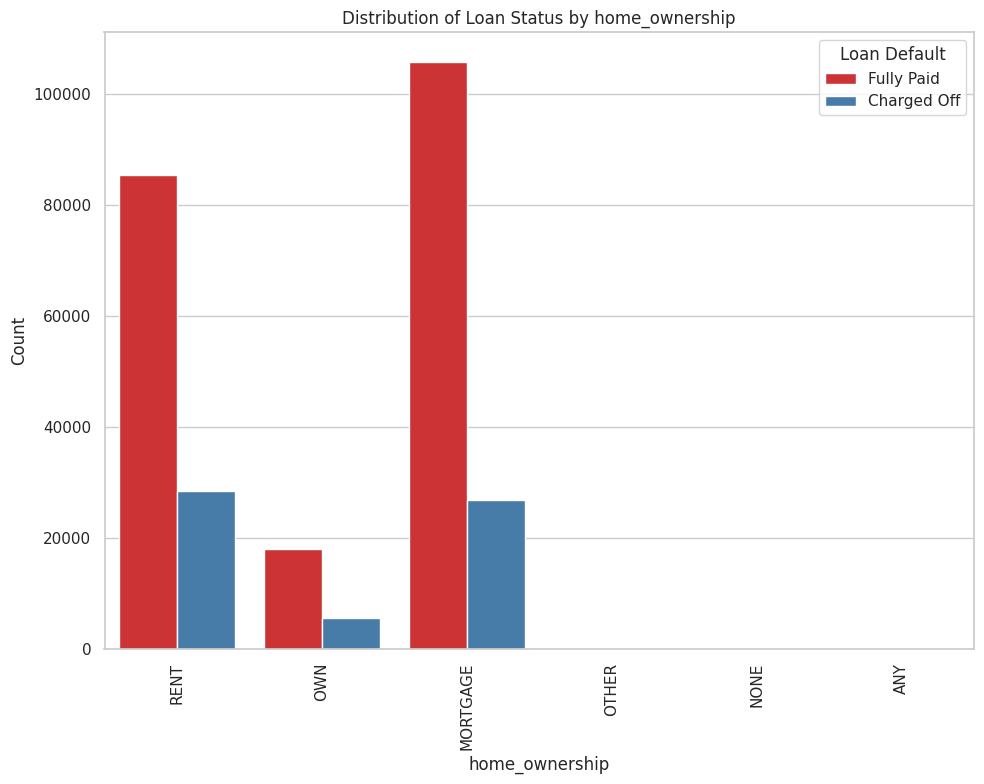

In [ ]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 8))
sns.countplot(x='home_ownership', hue='loan_default', data=df2, palette='Set1')

# Add labels and title
plt.xlabel('home_ownership')
plt.ylabel('Count')
plt.title('Distribution of Loan Status by home_ownership')

# Customize legend
plt.legend(title='Loan Default', labels=['Fully Paid', 'Charged Off'])

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

people who live in a rental/mortgaged house seem have higher chance of borrowing money when compared to other categories. but both have high number of people who have fully paid their loans and also people who have defaulted, hence it will difficult to come to any conclusions.

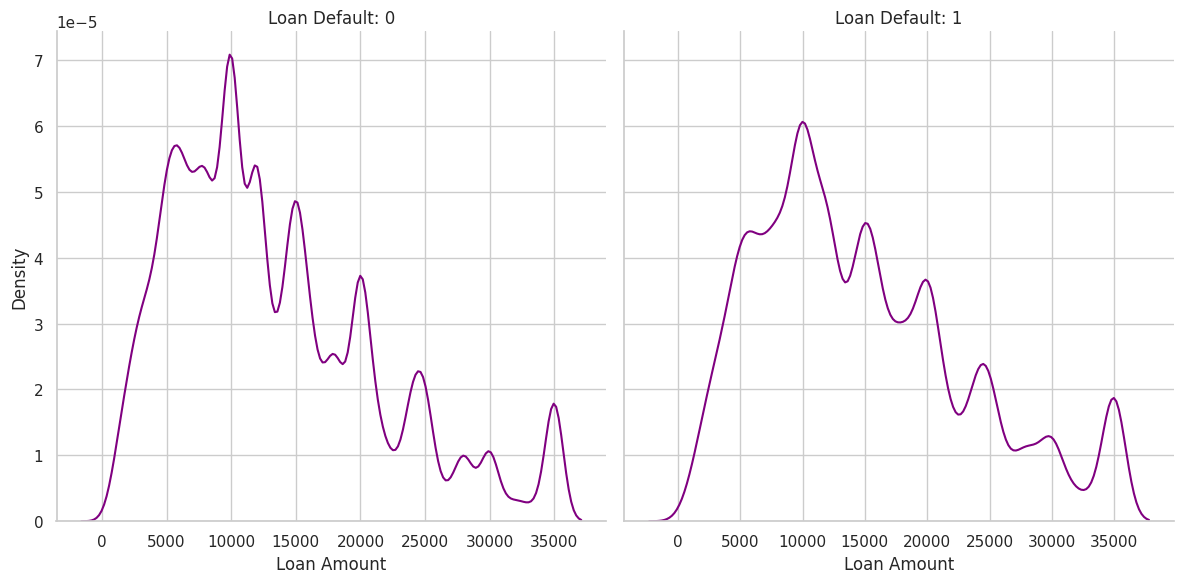

In [ ]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a FacetGrid for the KDE plots
g = sns.FacetGrid(df2, col="loan_default", col_wrap=2, height=6, sharex=False)

# Map KDE plots onto the FacetGrid
g.map(sns.kdeplot, "loan_amnt", color='purple')

# Set labels and title
g.set_axis_labels("Loan Amount", "Density")
g.set_titles(col_template="Loan Default: {col_name}")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

the above is the distribution curve of loan amount for people who have fully paid (loan default = 0) and charged off (loan default = 1).

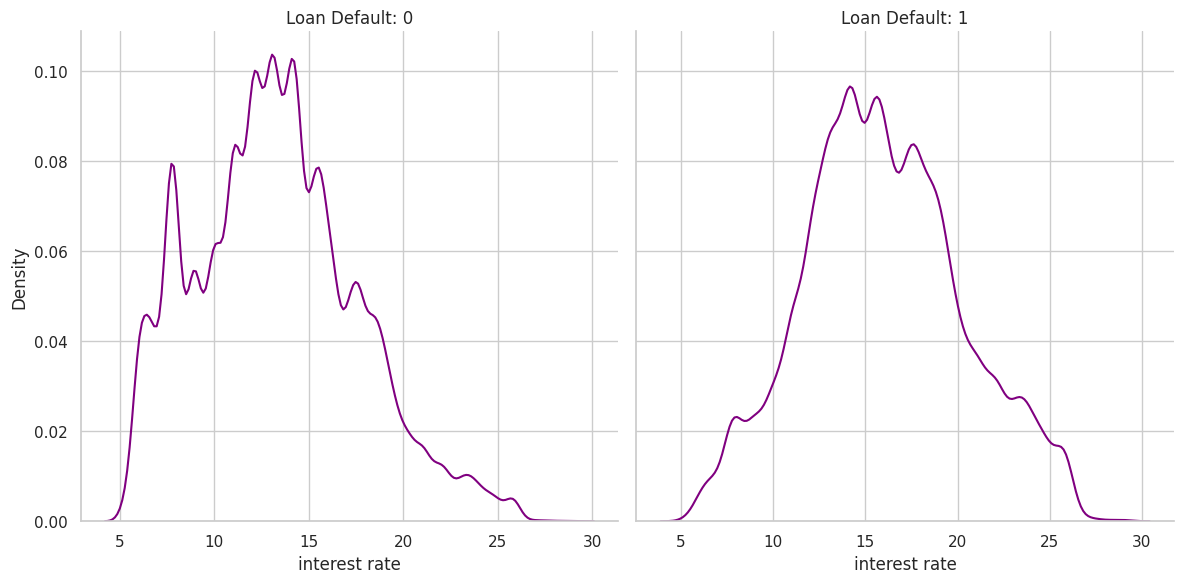

In [ ]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a FacetGrid for the KDE plots
g = sns.FacetGrid(df2, col="loan_default", col_wrap=2, height=6, sharex=False)

# Map KDE plots onto the FacetGrid
g.map(sns.kdeplot, "int_rate", color='purple')

# Set labels and title
g.set_axis_labels("interest rate", "Density")
g.set_titles(col_template="Loan Default: {col_name}")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

the above is the distribution curve of interest rate for people who have fully paid (loan default = 0) and charged off (loan default = 1). from the plot we see that more number people who borrowed money at lower interest rate seem to have repaid their loans.

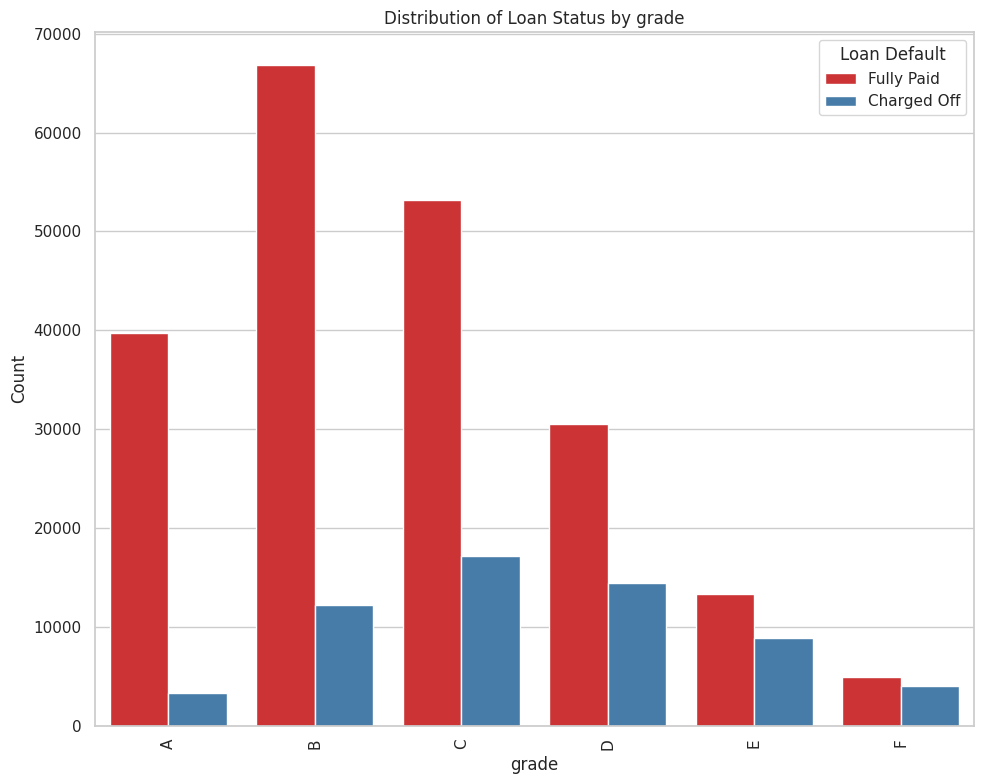

In [ ]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Define the desired order of grades
grade_order = ['A', 'B', 'C', 'D', 'E', 'F']

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 8))
sns.countplot(x='grade', hue='loan_default', data=df2, palette='Set1', order=grade_order)

# Add labels and title
plt.xlabel('grade')
plt.ylabel('Count')
plt.title('Distribution of Loan Status by grade')

# Customize legend
plt.legend(title='Loan Default', labels=['Fully Paid', 'Charged Off'])

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

we can see that maximum number of loans issued were of the grade B. And also as the grade increases percentages of the defaulters also increases.

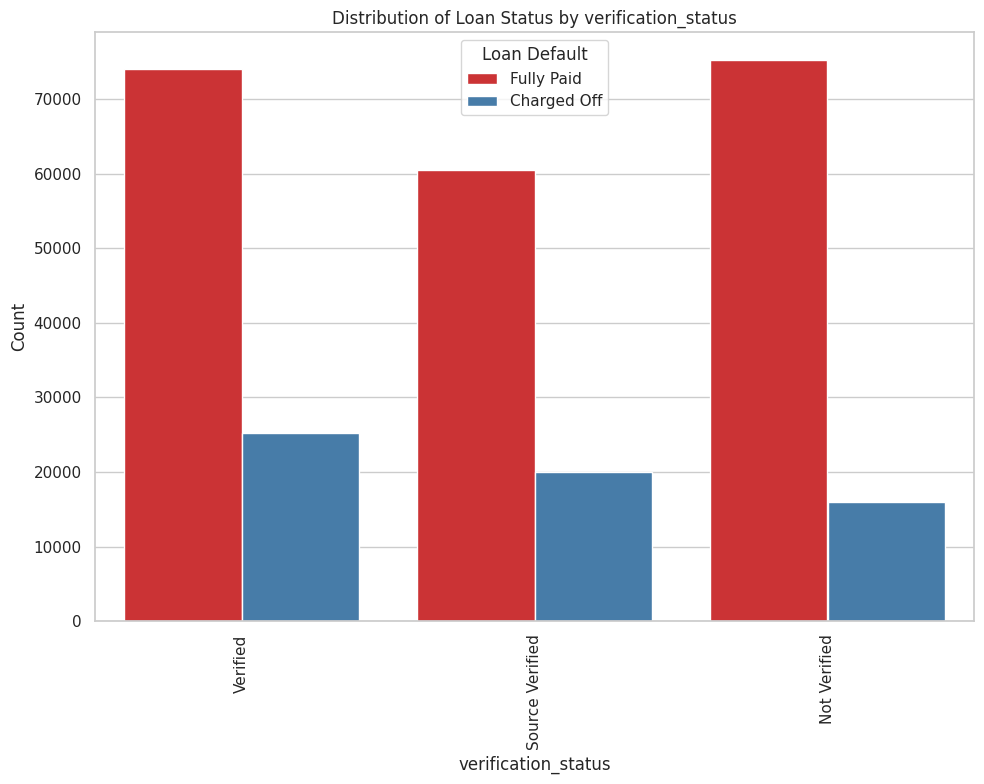

In [ ]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 8))
sns.countplot(x='verification_status', hue='loan_default', data=df2, palette='Set1')

# Add labels and title
plt.xlabel('verification_status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status by verification_status')

# Customize legend
plt.legend(title='Loan Default', labels=['Fully Paid', 'Charged Off'])

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

people with all types of verification statuses have a similar number of borrowers who have fully paid/ charged off their loan.

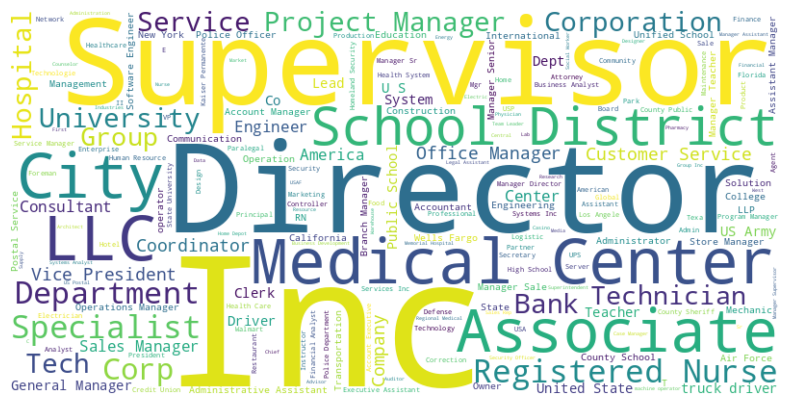

In [ ]:
# visualizing the top employee titles of borrowers from the original data set
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Extract the text from the specified column as a single string
text_data = " ".join(df1['emp_title'].dropna())

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#check for null values - after dropping issued and current loans
df2.isnull().sum(axis=0)*100/len(df2)

loan_amnt                      0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      5.581663
emp_length                     4.010159
home_ownership                 0.000000
annual_inc                     0.001477
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
purpose                        0.000000
title                          0.005537
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.010706
earliest_cr_line               0.010706
inq_last_6mths                 0.010706
mths_since_last_delinq        55.074256
open_acc                       0.010706
pub_rec                        0.010706
revol_bal                      0.000000
revol_util                     0.092659


In [ ]:
#dropping mths_since_last_delinq as it has high % of null values
df2.drop(columns='mths_since_last_delinq', inplace=True)

We will drop three additional columns that may not be of much importance for the analysis.

- "addr_state": This column represents the two-letter abbreviation of the U.S. state where the borrower resides. It indicates the state of the borrower's address.

- "initial_list_status": This column indicates the initial listing status of the loan. It may have values like "w" (whole), "f" (fractional), or other codes that represent the way the loan was listed on the LendingClub platform.

- "pymnt_plan": This column indicates if the borrower is on a payment plan for their loan. It may have values like "y" (yes) or "n" (no), indicating whether the borrower has a payment plan in place.

In [ ]:
#verification_status
df2.drop(columns=["addr_state", "initial_list_status"], inplace=True, axis=1)

# Missing Value Treatment

Approach1: Drop the columns tot_coll_amt, tot_cur_bal, total_rev_hi_lim and dropna for the remaining missing values \
Approach 2: Impute the missing values using KNN

In [ ]:
df3=df2.drop(columns=['tot_coll_amt','tot_cur_bal','total_rev_hi_lim'], axis=1)

In [ ]:
df3.shape

(270887, 28)

In [ ]:
df3.dropna(inplace=True) #dropping all other columns with even a single missing value

In [ ]:
df3.shape

(255300, 28)

We have lost around 5-6% of the data in the process of dropna()

In [ ]:
df3.reset_index(inplace=True, drop=True)

In [ ]:
df3.isnull().sum(axis=0)*100/len(df2)

loan_amnt                     0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
purpose                       0.0
title                         0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc                     0.0
collections_12_mths_ex_med    0.0
application_type              0.0
acc_now_delinq                0.0
loan_default                  0.0
dtype: float64

In [ ]:
# finding a column that has the same value in all rows and dropping it
columns_with_same_values = [col for col in df2.columns if df2[col].nunique() == 1]

In [ ]:
columns_with_same_values

[]

There are no columns with a single value.

In [ ]:
df3.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,application_type,acc_now_delinq,loan_default
0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,INDIVIDUAL,0.0,1
1,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,INDIVIDUAL,0.0,0
2,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,3.0,9.0,0.0,7963.0,28.3,12.0,0.0,INDIVIDUAL,0.0,0
3,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,...,2.0,4.0,0.0,8221.0,87.5,4.0,0.0,INDIVIDUAL,0.0,0
4,5375.0,60 months,12.69,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,...,0.0,2.0,0.0,9279.0,36.5,3.0,0.0,INDIVIDUAL,0.0,1


Let's look at the description of the columns in df3 at this point

In [ ]:
df_dict[df_dict['LoanStatNew']. isin (df3.columns.to_list())]

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
4,annual_inc,The self-reported annual income provided by the borrower during registration.
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borro...
12,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
13,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the ...
16,dti,A ratio calculated using the borrower’s total monthly debt payments on the total debt obligation...
18,earliest_cr_line,The month the borrower's earliest reported credit line was opened
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one yea...
20,emp_title,The job title supplied by the Borrower when applying for the loan.*
25,grade,LC assigned loan grade


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255300 entries, 0 to 255299
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   255300 non-null  float64
 1   term                        255300 non-null  object 
 2   int_rate                    255300 non-null  float64
 3   installment                 255300 non-null  float64
 4   grade                       255300 non-null  object 
 5   sub_grade                   255300 non-null  object 
 6   emp_title                   255300 non-null  object 
 7   emp_length                  255300 non-null  object 
 8   home_ownership              255300 non-null  object 
 9   annual_inc                  255300 non-null  float64
 10  verification_status         255300 non-null  object 
 11  issue_d                     255300 non-null  object 
 12  loan_status                 255300 non-null  object 
 13  purpose       

At this point, there are no null values in the dataset. Let's do some EDA and proceed with further indepth data cleaning

# Finding highly correlated columns

<ipython-input-56-5b00883259ab>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlated_matrix = df3.corr()


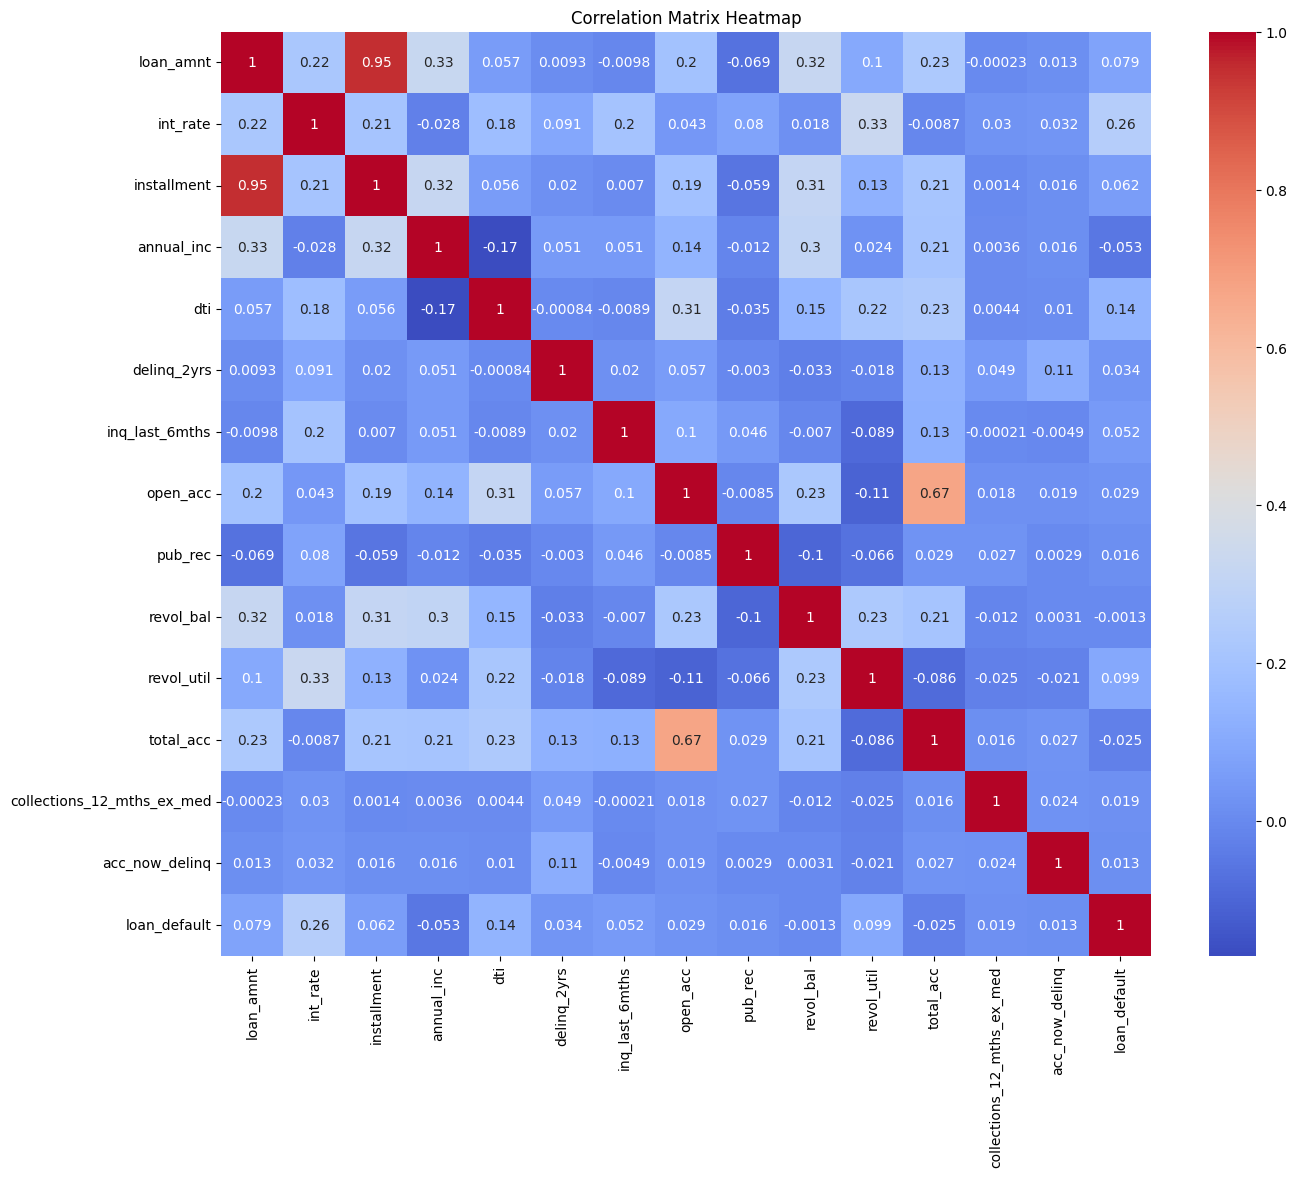

In [ ]:
# Compute the correlation matrix of the numerical predictors
correlated_matrix = df3.corr()
# Create a heatmap using the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlated_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
#dropping installment column as loan amount and installment are highly correlated(corr-coeff of 0.97)
# df3.drop('installment',inplace=True, axis=1)

# Data Visualization

Text(0.5, 1.0, 'Distribution of Loan Status vs emp_length')

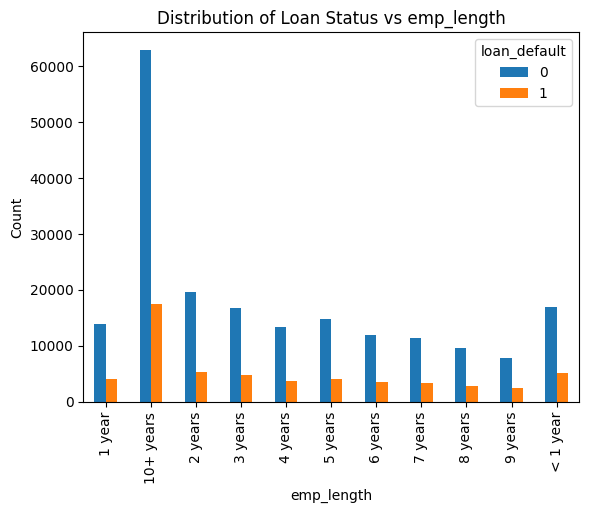

In [ ]:
el_loan_status_counts = df3.groupby(['emp_length', 'loan_default']).size().reset_index(name='count')
pivot_df = el_loan_status_counts.pivot(index='emp_length', columns='loan_default', values='count')

# Create a grouped bar chart to visualize the data
pivot_df.plot.bar()
plt.xlabel('emp_length')
plt.ylabel('Count')
plt.title('Distribution of Loan Status vs emp_length')

Text(0.5, 1.0, 'Distribution of Loan Status within Each loan grade')

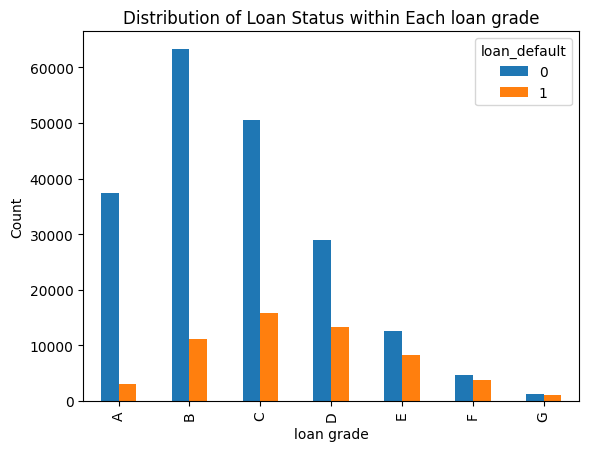

In [ ]:
# loan grade vs loan status
grade_loan_status_counts = df3.groupby(['grade', 'loan_default']).size().reset_index(name='count')
pivot_df = grade_loan_status_counts.pivot(index='grade', columns='loan_default', values='count')

# Create a grouped bar chart to visualize the data
pivot_df.plot.bar()
plt.xlabel('loan grade')
plt.ylabel('Count')
plt.title('Distribution of Loan Status within Each loan grade')

Text(0.5, 1.0, 'Distribution of Loan Status vs home_ownership')

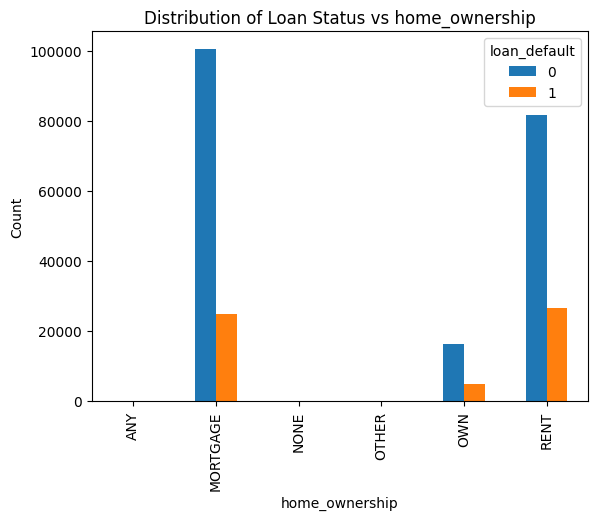

In [ ]:
#plotting home ownership bar chart
ho_loan_status_counts = df3.groupby(['home_ownership', 'loan_default']).size().reset_index(name='count')
pivot_df = ho_loan_status_counts.pivot(index='home_ownership', columns='loan_default', values='count')

# Create a grouped bar chart to visualize the data
pivot_df.plot.bar()
plt.xlabel('home_ownership')
plt.ylabel('Count')
plt.title('Distribution of Loan Status vs home_ownership')

# Pre-processing Categorical Columns and removing unwanted columns

We will be encoding categorical features and dropping non-important features in this section

In [ ]:
df3.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'application_type'],
      dtype='object')

# 1. Term

In [ ]:
df3['term'].value_counts()

 36 months    194992
 60 months     60308
Name: term, dtype: int64

We will later encode it using one-hot encoding

# 2. Grade and sub-grades

In [ ]:
df3['grade'].value_counts()

B    74490
C    66443
D    42279
A    40422
E    20932
F     8438
G     2296
Name: grade, dtype: int64

In [ ]:
df3['sub_grade'].value_counts()

B3    17542
B4    16690
C1    14957
C2    14530
B2    14260
B5    14233
C3    13039
C4    12414
B1    11765
A5    11601
C5    11503
A4    10551
D1    10360
D2     9397
D3     8245
D4     7835
A3     6823
D5     6442
A2     5909
A1     5538
E1     5146
E2     4938
E3     4142
E4     3644
E5     3062
F1     2461
F2     1926
F3     1687
F4     1313
F5     1051
G1      777
G2      567
G3      395
G4      292
G5      265
Name: sub_grade, dtype: int64

In [ ]:
#Since for grade and sub_grade, the order matters, we will user label-encoder to encode it
from sklearn.preprocessing import LabelEncoder

# Define a custom order for the labels
custom_order = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the custom order to the LabelEncoder to set the classes_ attribute
label_encoder.fit([label for label in custom_order.keys()])
#label_encoder.classes_ = [label for label in sorted(custom_order, key=custom_order.get)]

# Transform the 'grade' column using the LabelEncoder
df3['grade'] = label_encoder.transform(df3['grade'])

# Display the DataFrame with the encoded 'grade' column
df3

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,application_type,acc_now_delinq,loan_default
0,2500.0,60 months,15.27,59.83,2,C4,Ryder,< 1 year,RENT,30000.0,...,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,INDIVIDUAL,0.0,1
1,10000.0,36 months,13.49,339.31,2,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,INDIVIDUAL,0.0,0
2,5000.0,36 months,7.90,156.46,0,A4,Veolia Transportaton,3 years,RENT,36000.0,...,3.0,9.0,0.0,7963.0,28.3,12.0,0.0,INDIVIDUAL,0.0,0
3,3000.0,36 months,18.64,109.43,4,E1,MKC Accounting,9 years,RENT,48000.0,...,2.0,4.0,0.0,8221.0,87.5,4.0,0.0,INDIVIDUAL,0.0,0
4,5375.0,60 months,12.69,121.45,1,B5,Starbucks,< 1 year,RENT,15000.0,...,0.0,2.0,0.0,9279.0,36.5,3.0,0.0,INDIVIDUAL,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255295,17000.0,60 months,15.99,413.32,3,D2,customer service,10+ years,MORTGAGE,63078.0,...,0.0,8.0,0.0,11063.0,54.0,28.0,0.0,INDIVIDUAL,0.0,0
255296,4200.0,36 months,15.99,147.64,3,D2,supervisor,10+ years,MORTGAGE,48000.0,...,0.0,13.0,0.0,12943.0,63.4,45.0,0.0,INDIVIDUAL,0.0,1
255297,10775.0,36 months,6.03,327.95,0,A1,Coordinator of RSVP,< 1 year,RENT,54000.0,...,0.0,9.0,0.0,10776.0,25.8,21.0,0.0,INDIVIDUAL,0.0,0
255298,6225.0,36 months,16.49,220.37,3,D3,Painter,2 years,RENT,27000.0,...,1.0,3.0,0.0,1756.0,97.6,4.0,0.0,INDIVIDUAL,0.0,0


In [ ]:
# Create a LabelEncoder instance - getting error. need to check
# label_encoder = LabelEncoder()

# grades=['A','B','C', 'D', 'E', 'F','G']
# custom_order={}

# for i in range(len(grades)):
#   for j in range(5):
#     value=grades[i]+str(5*i+j)
#     custom_order['grade']=value

# # Fit the custom order to the LabelEncoder to set the classes_ attribute
# label_encoder.fit([label for label in custom_order.keys()])
# #label_encoder.classes_ = [label for label in sorted(custom_order, key=custom_order.get)]

# # Transform the 'grade' column using the LabelEncoder
# df2['e_sub_grade'] = label_encoder.transform(df2['sub_grade'])

# # Display the DataFrame with the encoded 'grade' column
# df2

In [ ]:
sub_grade_encoder = LabelEncoder()
sub_grade_encoder = label_encoder.fit(df3['sub_grade'])
df3['sub_grade'] = label_encoder.transform(df3['sub_grade'])

In [ ]:
df3.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,application_type,acc_now_delinq,loan_default
0,2500.0,60 months,15.27,59.83,2,13,Ryder,< 1 year,RENT,30000.0,...,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,INDIVIDUAL,0.0,1
1,10000.0,36 months,13.49,339.31,2,10,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,INDIVIDUAL,0.0,0
2,5000.0,36 months,7.90,156.46,0,3,Veolia Transportaton,3 years,RENT,36000.0,...,3.0,9.0,0.0,7963.0,28.3,12.0,0.0,INDIVIDUAL,0.0,0
3,3000.0,36 months,18.64,109.43,4,20,MKC Accounting,9 years,RENT,48000.0,...,2.0,4.0,0.0,8221.0,87.5,4.0,0.0,INDIVIDUAL,0.0,0
4,5375.0,60 months,12.69,121.45,1,9,Starbucks,< 1 year,RENT,15000.0,...,0.0,2.0,0.0,9279.0,36.5,3.0,0.0,INDIVIDUAL,0.0,1


# 3. emp_title

In [ ]:
df3['emp_title'].value_counts()

Manager                               2148
Teacher                               2119
Supervisor                             956
Registered Nurse                       927
RN                                     921
                                      ... 
Cadillac of Greenewich                   1
Exeter Hospital                          1
Ixia Communications (NASDAQ: XXIA)       1
Chubb Group of Insurance companies       1
Coordinator of RSVP                      1
Name: emp_title, Length: 139070, dtype: int64

There are around 139000 unique values. Encoding this will not be a good idea as it will result in a high-dimensional sparse data. Hence, we will drop it.

In [ ]:
df3.drop('emp_title', inplace=True, axis=1)

# 4. emp_length

In [ ]:
emp_length_map = {'< 1 year': 0,
                  '1 year': 1,
                  '2 years': 2,
                  '3 years': 3,
                  '4 years': 4,
                  '5 years': 5,
                  '6 years': 6,
                  '7 years': 7,
                  '8 years': 8,
                  '9 years': 9,
                  '10+ years': 10}

In [ ]:
df3['emp_length'].value_counts()

10+ years    80370
2 years      24915
< 1 year     22063
3 years      21489
5 years      18777
1 year       17989
4 years      16967
6 years      15410
7 years      14693
8 years      12498
9 years      10129
Name: emp_length, dtype: int64

In [ ]:
df3['emp_length'].isnull().sum()

0

In [ ]:
df3['emp_length'] = df3['emp_length'].apply(lambda x: emp_length_map[x])

 # 5. home_ownership

In [ ]:
df3['home_ownership'].value_counts()

MORTGAGE    125472
RENT        108309
OWN          21308
OTHER          169
NONE            41
ANY              1
Name: home_ownership, dtype: int64

In [ ]:
# clubbing ANY and NONE type into 'Other'
df3.loc[df3['home_ownership'].isin(['ANY', 'NONE']), 'home_ownership'] = 'Other'

# 5. verification_status

In [ ]:
df3['verification_status'].value_counts()

Verified           89603
Not Verified       89028
Source Verified    76669
Name: verification_status, dtype: int64

The values can be interpreted as follows:

- Verified: The borrower's income information has been independently verified through documentation, such as pay stubs, tax returns, or bank statements.

- Source Verified: The borrower's income information has been verified using third-party data sources, such as employment databases or credit bureaus.

- Not Verified: The borrower's income information has not been independently verified or the verification status is unknown.

This can be a useful predictor for loan default. We will do one-hot encoding of this column as well at the end of this section.

# 6. issue_d

This is the date on which the loan was issued. This column in conjuction with earliest_cr_line column(earliest credit history available for the applicant) to calculate the approximate credit history length.

 Calculating the length of borrower's credit history using - `earliest_cr_line` and `issue_d`

In [ ]:
df3[['issue_d','earliest_cr_line']].head()

,issue_d,earliest_cr_line
0,Dec-2011,Apr-1999
1,Dec-2011,Feb-1996
2,Dec-2011,Nov-2004
3,Dec-2011,Jan-2007
4,Dec-2011,Sep-2004


In [ ]:
#calculating credit length using loan issue date and earliest_cr_line
df3['credit_length'] = df3['issue_d'].str.split('-').str[1].astype(int) - df3['earliest_cr_line'].str.split('-').str[1].astype(int)

In [ ]:
df3['credit_length']

0         12
1         15
2          7
3          4
4          7
          ..
255295    16
255296    25
255297    40
255298     4
255299    13
Name: credit_length, Length: 255300, dtype: int64

In [ ]:
#we can now drop the issue_d and earliest_cr_line columns
df3.drop(['issue_d','earliest_cr_line'], inplace=True, axis=1)

# 7. loan_status

In [ ]:
df3['loan_status'].value_counts()

Fully Paid                                             196947
Charged Off                                             41730
Late (31-120 days)                                      10788
Late (16-30 days)                                        2192
Does not meet the credit policy. Status:Fully Paid       1818
Default                                                  1138
Does not meet the credit policy. Status:Charged Off       687
Name: loan_status, dtype: int64

We can drop off this column as we have already encoded it in `loan_default` column in the previous section.

In [ ]:
df3.drop('loan_status', inplace=True, axis=1)

# 8. title and purpose

In [ ]:
# change into lower case
df3['title'] = df3['title'].apply(str.lower)

In [ ]:
len(df3['title'].value_counts())

40021

In [ ]:
df3['title'].value_counts()

debt consolidation                     90991
credit card refinancing                23821
home improvement                        8667
other                                   6352
consolidation                           4982
                                       ...  
klf                                        1
travel processing wedding over seas        1
feuker debt consolidation                  1
wheels to work                             1
credit card/auto repair                    1
Name: title, Length: 40021, dtype: int64

In [ ]:
df3['purpose'].value_counts()

debt_consolidation    151490
credit_card            49937
home_improvement       14837
other                  14320
major_purchase          6215
small_business          4294
car                     3559
medical                 2831
moving                  2027
wedding                 1953
house                   1664
vacation                1546
educational              376
renewable_energy         251
Name: purpose, dtype: int64

Column `title` has too many categories. Encoding it will not be a good choice further down the pipeline. Alternatively, we will use column `purpose` for our analysis. It has fewer categories and captures similar information as loan title.

In [ ]:
df3.drop('title', inplace=True, axis=1)

We could have used one-hot encoding or use tf-idf to score each title and used it for our analysis. That's a scope of improvement for this project

In [ ]:
df3.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,application_type,acc_now_delinq,loan_default,credit_length
0,2500.0,60 months,15.27,59.83,2,13,0,RENT,30000.0,Source Verified,...,3.0,0.0,1687.0,9.4,4.0,0.0,INDIVIDUAL,0.0,1,12
1,10000.0,36 months,13.49,339.31,2,10,10,RENT,49200.0,Source Verified,...,10.0,0.0,5598.0,21.0,37.0,0.0,INDIVIDUAL,0.0,0,15
2,5000.0,36 months,7.90,156.46,0,3,3,RENT,36000.0,Source Verified,...,9.0,0.0,7963.0,28.3,12.0,0.0,INDIVIDUAL,0.0,0,7
3,3000.0,36 months,18.64,109.43,4,20,9,RENT,48000.0,Source Verified,...,4.0,0.0,8221.0,87.5,4.0,0.0,INDIVIDUAL,0.0,0,4
4,5375.0,60 months,12.69,121.45,1,9,0,RENT,15000.0,Verified,...,2.0,0.0,9279.0,36.5,3.0,0.0,INDIVIDUAL,0.0,1,7


# 9. application_type

In [ ]:
df3['application_type'].value_counts()

INDIVIDUAL    255297
JOINT              3
Name: application_type, dtype: int64

This column is not of much use as a predictor, as most of it values corresponds to individual. Hence, we will drop this column.

In [ ]:
df3.drop('application_type', axis=1, inplace=True)

# One-hot encoding of categorical features: `purpose`,`term`, `verification_status`, `home_ownership`

In [ ]:
#display column names that are of object type

In [ ]:
df3[['purpose','term', 'verification_status', 'home_ownership']].head()

,purpose,term,verification_status,home_ownership
0,car,60 months,Source Verified,RENT
1,other,36 months,Source Verified,RENT
2,wedding,36 months,Source Verified,RENT
3,car,36 months,Source Verified,RENT
4,other,60 months,Verified,RENT


In [ ]:
from sklearn.preprocessing import OneHotEncoder

#creating an one-hot encoder object
encoder = OneHotEncoder()

#converting the origin column to category
# df['origin'] = df['origin'].astype('str')

#fitting and transforming the origin column of the dataframe
encoded_data=encoder.fit_transform(df3[['purpose','term', 'verification_status', 'home_ownership']])

#converting the sparse matrix stored in encoded_data into a pandas dataframe
encoded_col = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out())

#concatenating the encoded columns to the original dataframe
df_final = pd.concat([df3.drop(columns=['purpose','term', 'verification_status', 'home_ownership'], axis=1), encoded_col], axis=1)

df_final.head()

,loan_amnt,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_Other,home_ownership_RENT
0,2500.0,15.27,59.83,2,13,0,30000.0,1.00,0.0,5.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,10000.0,13.49,339.31,2,10,10,49200.0,20.00,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5000.0,7.90,156.46,0,3,3,36000.0,11.20,0.0,3.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3000.0,18.64,109.43,4,20,9,48000.0,5.35,0.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5375.0,12.69,121.45,1,9,0,15000.0,18.08,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_final.columns

Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'loan_default',
       'credit_length', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'term_ 36 months',
       'term_ 60 months', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_Other', 'home_ownership_RENT'],
      dtype='object')

# Pre-processing numeric columns

In [ ]:
columns_num = ['emp_length', 'loan_amnt', 'int_rate', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq']

In [ ]:
df_final[columns_num].head()

,emp_length,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq
0,0,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,0.0
1,10,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0
2,3,5000.0,7.90,156.46,36000.0,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,0.0,0.0
3,9,3000.0,18.64,109.43,48000.0,5.35,0.0,2.0,4.0,0.0,8221.0,87.5,4.0,0.0,0.0
4,0,5375.0,12.69,121.45,15000.0,18.08,0.0,0.0,2.0,0.0,9279.0,36.5,3.0,0.0,0.0


Let's look at the description of the columns once again and check if they are relevant predictors.

In [ ]:
# Increase the maximum width for displaying string columns
pd.set_option('display.max_colwidth', 300)

In [ ]:
df_dict[df_dict['LoanStatNew'].isin(columns_num)]

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
4,annual_inc,The self-reported annual income provided by the borrower during registration.
12,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
13,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
16,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
32,inq_last_6mths,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
33,installment,The monthly payment owed by the borrower if the loan originates.
34,int_rate,Interest Rate on the loan
41,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."


All the above columns seem to be relevant predictors and also available to the lender at the time of loan application. Hence, there is no data leakage. We will retain all the columns as is.

# installment , annual_inc, and loan_amnt

# A final check for highly correlated features

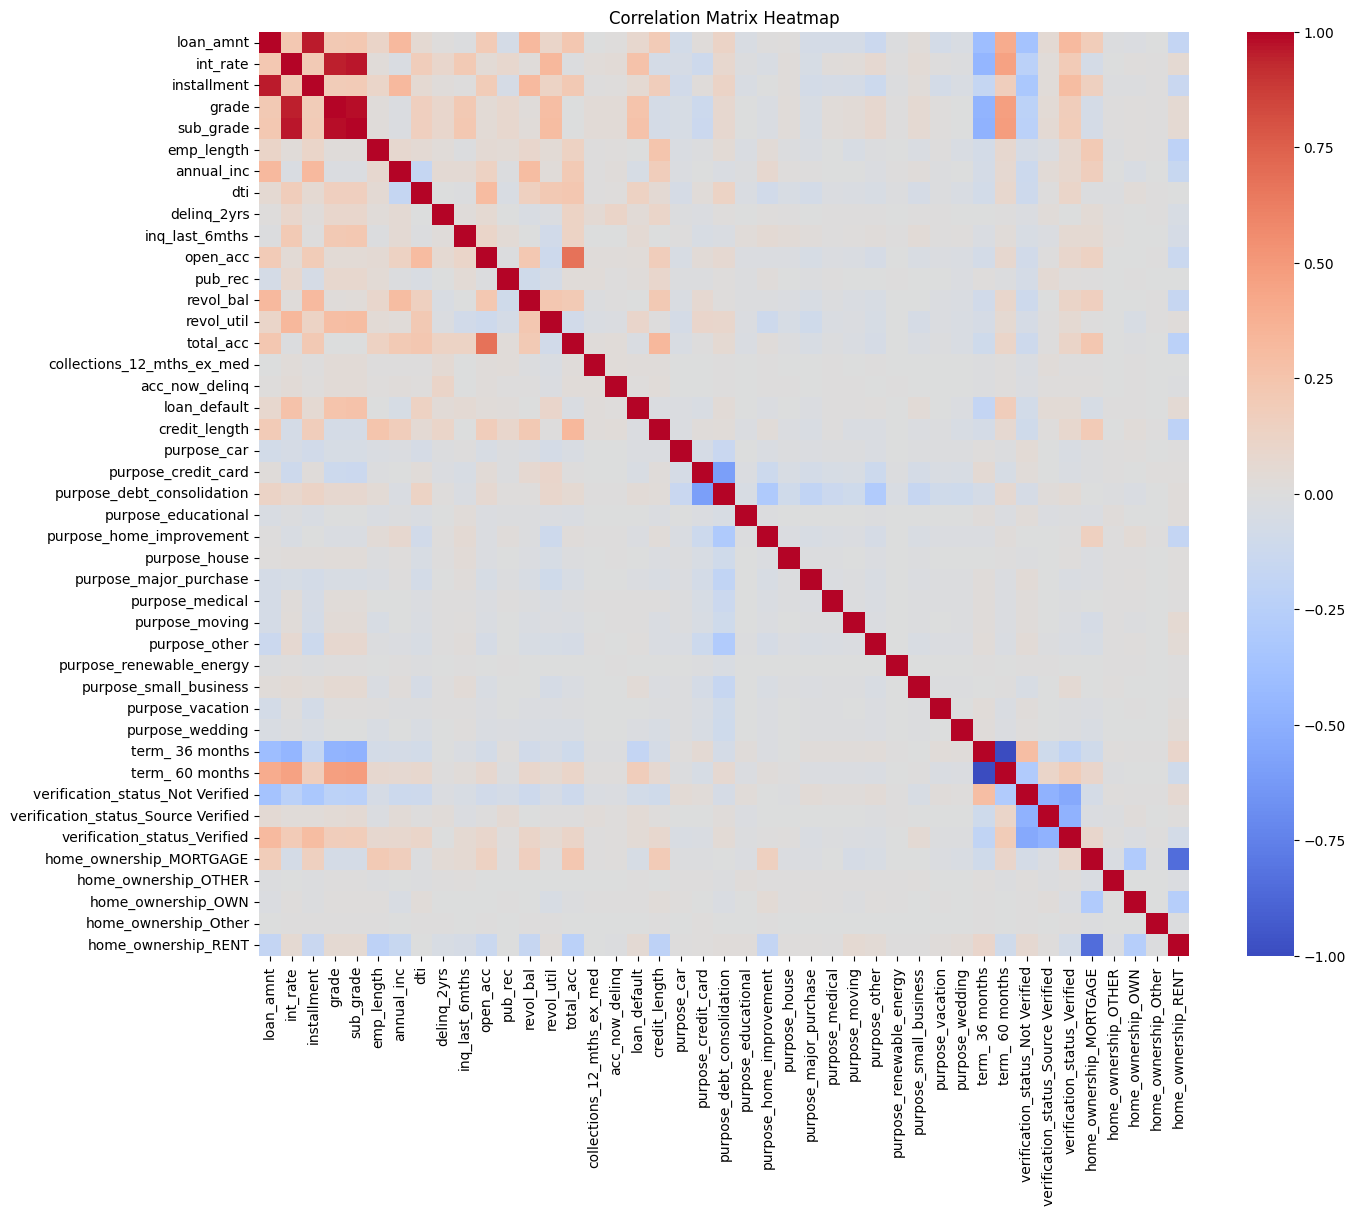

In [ ]:
# Compute the correlation matrix of the numerical predictors
correlated_matrix = df_final.corr()
# Create a heatmap using the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlated_matrix, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_final.corr()

# Set the correlation threshold
threshold = 0.7  # You can adjust this threshold based on your specific needs

# Find highly correlated column pairs
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

# Print or analyze the list of highly correlated column pairs
print("Pairs of highly correlated columns:", highly_correlated_pairs)


Pairs of highly correlated columns: [('loan_amnt', 'installment'), ('int_rate', 'grade'), ('int_rate', 'sub_grade'), ('grade', 'sub_grade'), ('term_ 36 months', 'term_ 60 months'), ('home_ownership_MORTGAGE', 'home_ownership_RENT')]




1.   Loan amount and installment are highly correlated. This is natural as high loan amount will result in high installment. Let's drop the installment column and proceed with the analysis.
2.   Interest rate, grade and sub-grades seem to be all correlated with one another. This is also natural as grade and sub-grade represents the risk of lending loan to the applicant. High risk loan will have high interest rate. We will keep interest rate and drop off all grade and sub-grade columns as they were encoded and not originally present like interest rate column.
3. term_36 months and term_60 months are correlated beacause the column term had only two unique values. So, whenever of the columns has a value 0, the other one takes the value of 1. Let's drop term_36 months from the data.
4. Let's also drop `home_ownership_RENT` as m-1 columns are enough to represent m classes during one-hot encoding.


In [ ]:
df_final.shape

(255300, 43)

In [ ]:
#creating installment/loan_amnt

#df_final['inst_ratio'] = df_final["installment"]/df_final["loan_amnt"]

In [ ]:
df_final.columns

Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'loan_default',
       'credit_length', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'term_ 36 months',
       'term_ 60 months', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_Other', 'home_ownership_RENT'],
      dtype='object')

In [ ]:
#dropping columns
df_final.drop(columns=['installment', 'grade', 'sub_grade','term_ 36 months','home_ownership_RENT'], axis=1, inplace=True)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_final.corr()

# Set the correlation threshold
threshold = 0.7  # You can adjust this threshold based on your specific needs

# Find highly correlated column pairs
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated_pairs.append(pair)

# Print or analyze the list of highly correlated column pairs
print("Pairs of highly correlated columns:", highly_correlated_pairs)

Pairs of highly correlated columns: []


In [ ]:
df_final.shape

(255300, 38)

We have removed all highly correlated features. The final dataset contains 38 features and 255,300 records.

In [ ]:
df_final.head()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,purpose_vacation,purpose_wedding,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_Other
0,2500.0,15.27,0,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,10000.0,13.49,10,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,5000.0,7.90,3,36000.0,11.20,0.0,3.0,9.0,0.0,7963.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3000.0,18.64,9,48000.0,5.35,0.0,2.0,4.0,0.0,8221.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5375.0,12.69,0,15000.0,18.08,0.0,0.0,2.0,0.0,9279.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_final.to_csv("/content/drive/MyDrive/My colab notebooks/Data Mining/Final project/Dataset/lc_loan_cleaned.csv", index=False)

# Modeling

# Logistic Regression

In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns

#from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [137]:
df_final=pd.read_csv("/content/drive/MyDrive/My colab notebooks/Data Mining/Final project/Dataset/lc_loan_cleaned.csv")

In [138]:
df_final.head()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,purpose_vacation,purpose_wedding,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_Other
0,2500.0,15.27,0,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,10000.0,13.49,10,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,5000.0,7.90,3,36000.0,11.20,0.0,3.0,9.0,0.0,7963.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3000.0,18.64,9,48000.0,5.35,0.0,2.0,4.0,0.0,8221.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5375.0,12.69,0,15000.0,18.08,0.0,0.0,2.0,0.0,9279.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [139]:
df_final['loan_default'].value_counts()

0    198765
1     56535
Name: loan_default, dtype: int64

In [140]:
df_final.head()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,purpose_vacation,purpose_wedding,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_Other
0,2500.0,15.27,0,30000.0,1.00,0.0,5.0,3.0,0.0,1687.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,10000.0,13.49,10,49200.0,20.00,0.0,1.0,10.0,0.0,5598.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,5000.0,7.90,3,36000.0,11.20,0.0,3.0,9.0,0.0,7963.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3000.0,18.64,9,48000.0,5.35,0.0,2.0,4.0,0.0,8221.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5375.0,12.69,0,15000.0,18.08,0.0,0.0,2.0,0.0,9279.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [141]:
df_final.columns

Index(['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'loan_default', 'credit_length', 'purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'term_ 60 months',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_Other'],
      dtype='object')

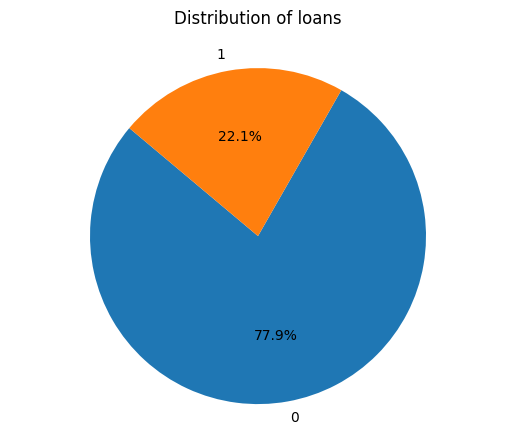

In [142]:
# Get value counts of the 'Category' column
value_counts = df_final['loan_default'].value_counts()

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of loans',  pad=20)
plt.show()

In [143]:
df_final.index

RangeIndex(start=0, stop=255300, step=1)

In [144]:
#defining predictor and target variables
X=df_final.drop(columns='loan_default')
y=df_final['loan_default']

In [145]:
#performing train test split and creating a logistic model. stratify sampling to maintain data distribution
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3, random_state=42)

In [146]:
X_train.columns

Index(['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'credit_length', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'term_ 60 months',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_Other'],
      dtype='object')

Feature scaling - scaling train and test data separately

In [147]:
numeric_columns=['loan_amnt', 'emp_length',	'int_rate',	'annual_inc',	'dti',	'delinq_2yrs',	'inq_last_6mths',	'open_acc',	'pub_rec',	'revol_bal',	'revol_util','total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'credit_length']

In [148]:
len(numeric_columns)

15

In [149]:
# Select numeric columns from the original DataFrame
numeric_data = df_final[numeric_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the numeric data
X_train_transform = scaler.fit_transform(X_train[numeric_columns])
X_valid_transform = scaler.transform(X_valid[numeric_columns])

#Create DataFrames with the scaled data and the same column names
X_train_scaled = pd.DataFrame(X_train_transform , columns=numeric_columns,index=X_train.index)
X_valid_scaled = pd.DataFrame(X_valid_transform , columns=numeric_columns,index=X_valid.index)

# Concatenate the scaled numeric data with non-numeric columns for train and test DataFrames
train_non_numeric_columns =X_train.drop(columns=numeric_columns, axis=1)
test_non_numeric_columns = X_valid.drop(columns=numeric_columns, axis=1)

X_train_scaled = pd.concat([train_non_numeric_columns, X_train_scaled], axis=1)
X_valid_scaled = pd.concat([test_non_numeric_columns, X_valid_scaled], axis=1)

In [150]:
X_train_scaled

,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,...,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,credit_length
62523,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.343233,1.842110,0.594585,-0.326516,-0.386642,-0.656642,0.666225,-0.079213,-0.052428,1.465465
71642,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.343233,0.971225,0.189849,-0.326516,1.543162,0.561406,-0.096764,-0.079213,-0.052428,2.789937
83234,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.343233,-0.770547,-0.417256,-0.326516,-0.020320,-0.413841,-0.011987,-0.079213,-0.052428,-0.741989
75167,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.343233,0.971225,0.392217,-0.326516,0.849839,0.658527,-0.520646,-0.079213,-0.052428,-0.889153
251189,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.343233,0.100339,0.189849,-0.326516,0.173909,0.423820,0.157566,-0.079213,-0.052428,-0.006171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.343233,0.971225,-0.417256,-0.326516,-0.270737,1.342414,1.344437,-0.079213,-0.052428,0.435320
103694,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.343233,-0.770547,0.594585,-0.326516,-0.419690,0.480473,0.327119,-0.079213,-0.052428,-0.300498
131932,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.302410,0.100339,-0.012520,-0.326516,-0.004192,1.233154,1.090108,-0.079213,-0.052428,-0.300498
146867,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.343233,0.100339,0.594585,-0.326516,-0.510190,-1.943483,1.005331,-0.079213,-0.052428,2.054119


In [151]:
train_non_numeric_columns.index

Int64Index([ 62523,  71642,  83234,  75167, 251189,   6439, 232912, 167287,
             52903,  54627,
            ...
            213458, 137337,  54886, 207892, 110268, 119879, 103694, 131932,
            146867, 121958],
           dtype='int64', length=178710)

In [152]:
X_train_scaled.index

Int64Index([ 62523,  71642,  83234,  75167, 251189,   6439, 232912, 167287,
             52903,  54627,
            ...
            213458, 137337,  54886, 207892, 110268, 119879, 103694, 131932,
            146867, 121958],
           dtype='int64', length=178710)

In [153]:
train_non_numeric_columns.index

Int64Index([ 62523,  71642,  83234,  75167, 251189,   6439, 232912, 167287,
             52903,  54627,
            ...
            213458, 137337,  54886, 207892, 110268, 119879, 103694, 131932,
            146867, 121958],
           dtype='int64', length=178710)

In [154]:
#changing the X_train_scaled index same as the X_train index just to be double sure
X_train_scaled.index = X_train.index
X_valid_scaled.index = X_valid.index

In [155]:
y_train.value_counts()*100/len(y_train)

0    77.890997
1    22.109003
Name: loan_default, dtype: float64

In [156]:
y_valid.value_counts()*100/len(y_valid)

0    77.772555
1    22.227445
Name: loan_default, dtype: float64

The distribution of positive and negative classes are maintained in test and train set due to stratified sampling.

## Model 1.1 Simple Logistic Regression


In [23]:
lr1=LogisticRegression(random_state=42,max_iter=1000)
lr1.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [27]:
#predicting labels and probabilities
y_train_pred=lr1.predict(X_train_scaled)
train_pred_prob=lr1.predict_proba(X_train_scaled)

In [28]:
# printing classification report for tarining set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87    139199
           1       0.54      0.10      0.17     39511

    accuracy                           0.78    178710
   macro avg       0.67      0.54      0.52    178710
weighted avg       0.74      0.78      0.72    178710



In [29]:
#predicting test data
y_val_pred=lr1.predict(X_valid_scaled)
print(classification_report(y_valid,y_val_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87     59566
           1       0.55      0.10      0.16     17024

    accuracy                           0.78     76590
   macro avg       0.67      0.54      0.52     76590
weighted avg       0.74      0.78      0.72     76590



The model is performing well on predicting negative classes(non-default) but very poor on predicting postive(default) classes. The model has a recall value of 0 for class 1, meaning model is not able to predict none(most) of the positive instances correctly.

In [30]:
# confusion matrix for train and test
cm_train = confusion_matrix(y_train, y_train_pred)
cm_valid = confusion_matrix(y_valid, y_val_pred)

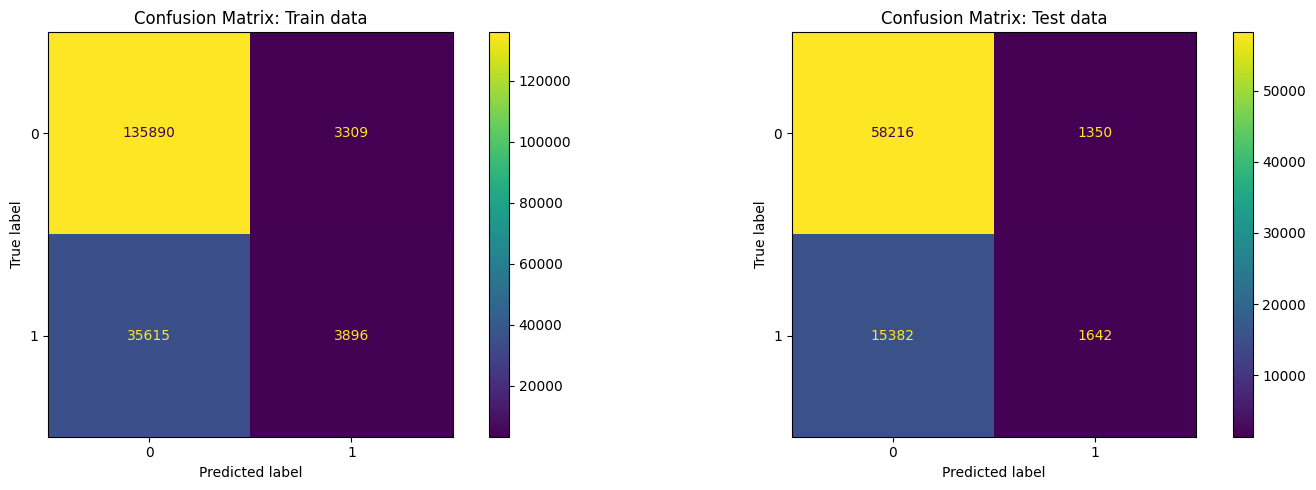

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotting the train confusion matrix on the left subplot
axs[0].set_title('Confusion Matrix: Train data')
ConfusionMatrixDisplay(cm_train, display_labels=lr1.classes_).plot(ax=axs[0])

# Plotting the test confusion matrix on the right subplot
axs[1].set_title('Confusion Matrix: Test data')
ConfusionMatrixDisplay(cm_valid, display_labels=lr1.classes_).plot(ax=axs[1])

plt.tight_layout()
plt.show()


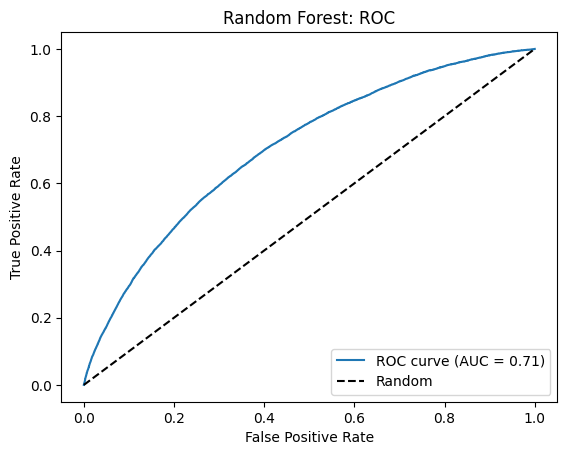

In [36]:
# predict probabilities
pred_probability = lr1.predict_proba(X_valid_scaled)

# calculating true positive rate, false positive rate and thresholds for the ROC curve
fpr,tpr,threshold = roc_curve(y_valid, pred_probability[:,1],pos_label=1)
#calculating auc score
auc_score = roc_auc_score(y_valid, pred_probability[:,1])

# creating random baseline where the classifier has no predictive power and would result in a diagonal line from (0,0) to (1,1)
random_probs = [0 for i in range(len(y_valid))]
p_fpr, p_tpr, _ = roc_curve(y_valid, random_probs, pos_label=1)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot(p_fpr, p_tpr, 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest: ROC')
plt.legend(loc='lower right')
plt.show()

## Model 1.2. Logistic Regression with L2 Regularization and balanced class weight

In [37]:
lr2=LogisticRegression(random_state=42,max_iter=1000,  penalty='l2', class_weight='balanced')
lr2.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

It was observed even without l2 penalty and only 'balanced' class weight, the model performed very similar to the results we have gotten for this model.

In [38]:
#predicting labels and probabilities
y_train_pred=lr2.predict(X_train_scaled)
train_pred_prob=lr2.predict_proba(X_train_scaled)

In [39]:
# printing classification report for tarining set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.66      0.75    139199
           1       0.35      0.64      0.45     39511

    accuracy                           0.65    178710
   macro avg       0.61      0.65      0.60    178710
weighted avg       0.75      0.65      0.68    178710



In [40]:
#predicting test data
y_val_pred=lr2.predict(X_valid_scaled)
print(classification_report(y_valid,y_val_pred))

              precision    recall  f1-score   support

           0       0.86      0.66      0.75     59566
           1       0.35      0.64      0.45     17024

    accuracy                           0.65     76590
   macro avg       0.61      0.65      0.60     76590
weighted avg       0.75      0.65      0.68     76590



In [41]:
# confusion matrix for train and test
cm_train = confusion_matrix(y_train, y_train_pred)
cm_valid = confusion_matrix(y_valid, y_val_pred)

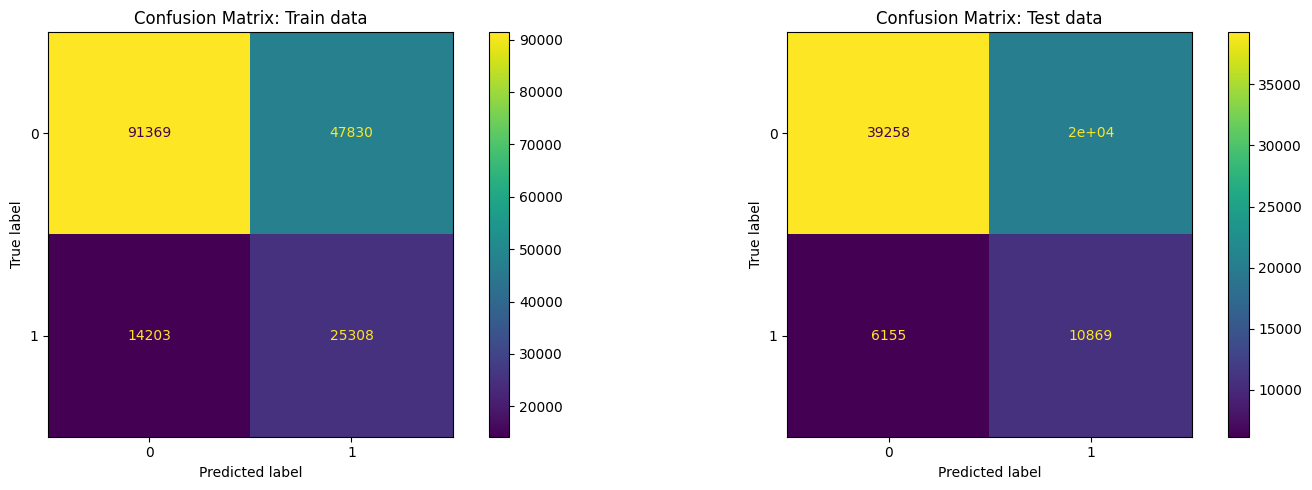

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotting the train confusion matrix on the left subplot
axs[0].set_title('Confusion Matrix: Train data')
ConfusionMatrixDisplay(cm_train, display_labels=lr2.classes_).plot(ax=axs[0])

# Plotting the test confusion matrix on the right subplot
axs[1].set_title('Confusion Matrix: Test data')
ConfusionMatrixDisplay(cm_valid, display_labels=lr2.classes_).plot(ax=axs[1])

plt.tight_layout()
plt.show()


The model has gotten better in identifying positive classes at the cost of increasing the false positives.That is, the model is predciting many non-default records also as default ones.

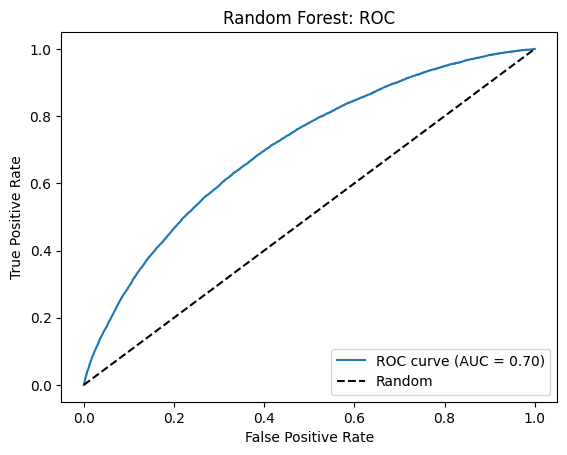

In [43]:
# predict probabilities
pred_probability = lr2.predict_proba(X_valid_scaled)

# calculating true positive rate, false positive rate and thresholds for the ROC curve
fpr,tpr,threshold = roc_curve(y_valid, pred_probability[:,1],pos_label=1)
#calculating auc score
auc_score = roc_auc_score(y_valid, pred_probability[:,1])

# creating random baseline where the classifier has no predictive power and would result in a diagonal line from (0,0) to (1,1)
random_probs = [0 for i in range(len(y_valid))]
p_fpr, p_tpr, _ = roc_curve(y_valid, random_probs, pos_label=1)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot(p_fpr, p_tpr, 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest: ROC')
plt.legend(loc='lower right')
plt.show()

## Model 1.3 Logistic regression with class_weight=1:5

In [44]:
lr3=LogisticRegression(random_state=42,max_iter=1000, solver='liblinear', penalty='l2', class_weight={0:1, 1:5})
lr3.fit(X_train_scaled,y_train)

LogisticRegression(class_weight={0: 1, 1: 5}, max_iter=1000, random_state=42,
                   solver='liblinear')

It was observed even without l2 penalty and only 'balanced' class weight, the model performed very similar to the results we have gotten for this model.

In [45]:
#predicting labels and probabilities
y_train_pred=lr3.predict(X_train_scaled)
#train_pred_prob=lr2.predict_proba(X_train_scaled)

In [46]:
# printing classification report for tarining set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.47      0.62    139199
           1       0.30      0.80      0.44     39511

    accuracy                           0.54    178710
   macro avg       0.60      0.64      0.53    178710
weighted avg       0.76      0.54      0.58    178710



In [47]:
#predicting test data
y_val_pred=lr3.predict(X_valid_scaled)
print(classification_report(y_valid,y_val_pred))

              precision    recall  f1-score   support

           0       0.89      0.47      0.62     59566
           1       0.30      0.80      0.44     17024

    accuracy                           0.55     76590
   macro avg       0.60      0.64      0.53     76590
weighted avg       0.76      0.55      0.58     76590



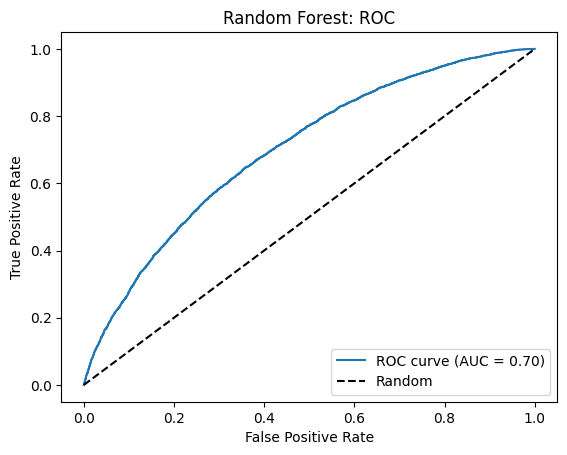

In [59]:
# predict probabilities
pred_probability = rf1.predict_proba(X_valid)

# calculating true positive rate, false positive rate and thresholds for the ROC curve
fpr,tpr,threshold = roc_curve(y_valid, pred_probability[:,1],pos_label=1)
#calculating auc score
auc_score = roc_auc_score(y_valid, pred_probability[:,1])

# creating random baseline where the classifier has no predictive power and would result in a diagonal line from (0,0) to (1,1)
random_probs = [0 for i in range(len(y_valid))]
p_fpr, p_tpr, _ = roc_curve(y_valid, random_probs, pos_label=1)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot(p_fpr, p_tpr, 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest: ROC')
plt.legend(loc='lower right')
plt.show()

## Model 1.4 Evaluating the model 1.3 with Stratified K-fold cross validation

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline

# Assuming you have your features (X) and target variable (y) prepared

# Number of folds for cross-validation
n_splits = 5

# Initialize the StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store recall and F1-score values
f1_scores=[]
recall_scores = []
precision_scores = []
auc=[]

# Define a pipeline with scaling and logistic regression which does scaling at each fold automatically
lr4 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=42,max_iter=1000, solver='liblinear', penalty='l2', class_weight={0:1, 1:5}))  # Logistic Regression
])

# Perform stratified k-fold cross-validation
for train_index, valid_index in stratified_kfold.split(X_train, y_train):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    # Fit the model on the training data
    lr4.fit(X_train, y_train)

    # Predict on the validation data
    y_pred = lr4.predict(X_valid)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel()

    # Calculate recall and precision for positive class
    recall_positive = tp / (tp + fn)
    precision_positive = tp / (tp + fp)

    recall_scores.append(recall_positive)
    precision_scores.append(precision_positive)

    auc_score = roc_auc_score(y_valid, y_pred)
    auc.append(auc_score)

    f1score=f1_score(y_valid, y_pred)
    f1_scores.append(f1score)


# Calculate the mean and standard deviation of recall and F1-score values
mean_recall = sum(recall_scores) / n_splits
std_recall = np.std(recall_scores)

mean_f1 = sum(f1_scores) / n_splits
std_f1 = np.std(f1_scores)

mean_auc = sum(auc) / n_splits
std_auc = np.std(auc)

print(f'Mean Recall: {mean_recall:.4f}')
print(f'Standard Deviation (Recall): {std_recall:.4f}')

print(f'Mean F1-score: {mean_f1:.4f}')
print(f'Standard Deviation (F1-score): {std_f1:.4f}')


print(f'AUC Score: {auc_score:.4f}')
print(f'Standard Deviation(AUC Score): {std_auc:.4f}')

Mean Recall: 0.7229
Standard Deviation (Recall): 0.0037
Mean F1-score: 0.0000
Standard Deviation (F1-score): nan
AUC Score: 0.6440
Standard Deviation(AUC Score): 0.0031


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In the previous model lr3, with the same model parameters and a single train-test split, we obtained  recall of 0.80 and roc-auc as 0.7. But when we try to generalize the model, the model's recall decreases to 0.72 and AUC score decreases to 0.64

# Model 2. Random Forest

## Model 2.1 Random Forest with Bootstrapping and 'balanced' class weight.

In [60]:
rf1 = RandomForestClassifier(n_estimators=100, random_state=1, max_features = 'sqrt', class_weight='balanced', bootstrap=True, max_depth=10)
rf1.fit(X_train, y_train) # tree models don't require feature scaling. so we just use X_train without scaling

# # variable (feature) importance plot
# importances = rf.feature_importances_
# std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
# df_rf = pd.DataFrame({'feature': X_train_scaled.columns, 'importance': importances, 'std': std})
# df_rf = df_rf.sort_values('importance')
# print(df_rf)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=1)

Same random forest model was tried out with only bootstrapping and no class_weight as 'balanced'. It resulted in a very poor recall(0.06) and f-1 score(0.1). Increasing the class weight beyond 'balanced' along with bootstrapping decreases the model performance unlike in logistic regression where it improved the model performance. This could be due to overfitting as we are already using bootstrapping to reduce the effect of class imbalance on model performance.

In [62]:
# #plotting the feature importance plot
# ax = df_rf.plot(kind='barh', xerr='std', x='feature', legend=False)
# ax.set_ylabel('')
# plt.show()

In [63]:
#getting test and train predicted values
y_train_pred=rf1.predict(X_train)
y_val_pred=rf1.predict(X_valid)

In [64]:
# printing classification report for tarining set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79     92272
           1       0.35      0.67      0.46     22103

    accuracy                           0.70    114375
   macro avg       0.62      0.69      0.62    114375
weighted avg       0.79      0.70      0.73    114375



In [65]:
#predicting test data
print(classification_report(y_valid,y_val_pred))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77     23127
           1       0.31      0.60      0.41      5466

    accuracy                           0.67     28593
   macro avg       0.59      0.64      0.59     28593
weighted avg       0.77      0.67      0.70     28593



In [66]:
# confusion matrix for validation set
cm_train = confusion_matrix(y_train, y_train_pred)
cm_valid = confusion_matrix(y_valid, y_val_pred)

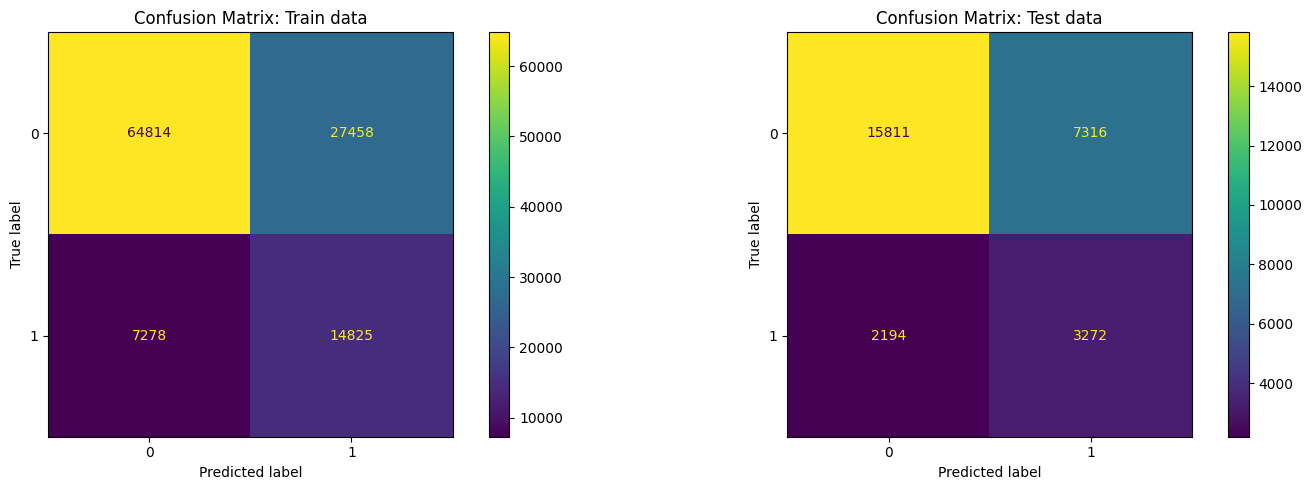

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotting the train confusion matrix on the left subplot
axs[0].set_title('Confusion Matrix: Train data')
ConfusionMatrixDisplay(cm_train, display_labels=rf1.classes_).plot(ax=axs[0])

# Plotting the test confusion matrix on the right subplot
axs[1].set_title('Confusion Matrix: Test data')
ConfusionMatrixDisplay(cm_valid, display_labels=rf1.classes_).plot(ax=axs[1])

plt.tight_layout()
plt.show()

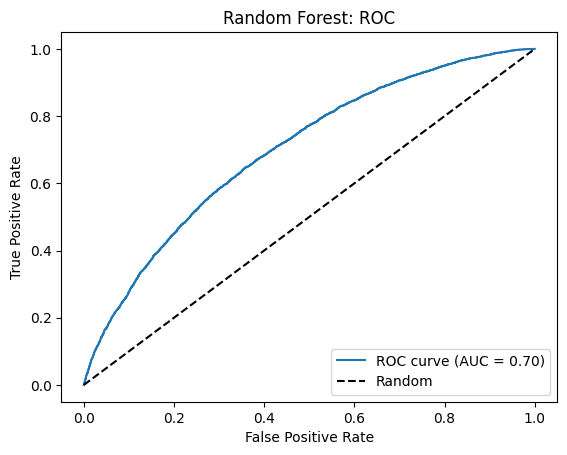

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities
pred_probability = rf2.predict_proba(X_valid)

# calculating true positive rate, false positive rate and thresholds for the ROC curve
fpr,tpr,threshold = roc_curve(y_valid, pred_probability[:,1],pos_label=1)
#calculating auc score
auc_score = roc_auc_score(y_valid, pred_probability[:,1])

# creating random baseline where the classifier has no predictive power and would result in a diagonal line from (0,0) to (1,1)
random_probs = [0 for i in range(len(y_valid))]
p_fpr, p_tpr, _ = roc_curve(y_valid, random_probs, pos_label=1)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot(p_fpr, p_tpr, 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest: ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#extra..can be edited later
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have your features (X) and target variable (y) prepared

# Number of folds for cross-validation
n_splits = 5

# Initialize the StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store recall, F1-score, and AUC values
f1_scores = []
recall_scores = []
auc_scores = []

# Define class weights and tree depths to iterate over
class_weights = [1, 2, 3]
tree_depths = [5, 10, 15]

# Perform stratified k-fold cross-validation
for train_index, valid_index in stratified_kfold.split(X_train, y_train):
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_train_fold, y_valid_fold = y_train[train_index], y_train[valid_index]

    for class_weight in class_weights:
        for tree_depth in tree_depths:
            # Define the Random Forest classifier
            rf1_cv = RandomForestClassifier(
                n_estimators=100,
                max_depth=tree_depth,
                class_weight={0: 1, 1: class_weight},
                random_state=42
            )

            # Fit the model on the training data
            rf.fit(X_train_fold, y_train_fold)

            # Predict on the validation data
            y_pred = rf1_cv.predict(X_valid_fold)

            # Calculate confusion matrix
            tn, fp, fn, tp = confusion_matrix(y_valid_fold, y_pred).ravel()

            # Calculate recall and F1-score for positive class
            recall_positive = tp / (tp + fn)
            f1_positive = f1_score(y_valid_fold, y_pred, pos_label=1)

            recall_scores.append(recall_positive)
            f1_scores.append(f1_positive)

            # Calculate AUC score
            auc_score = roc_auc_score(y_valid_fold, rf.predict_proba(X_valid_fold)[:, 1])
            auc_scores.append(auc_score)

# Calculate the mean and standard deviation of recall, F1-score, and AUC values
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)

mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)

print(f'Mean Recall: {mean_recall:.4f}')
print(f'Standard Deviation (Recall): {std_recall:.4f}')

print(f'Mean F1-score: {mean_f1:.4f}')
print(f'Standard Deviation (F1-score): {std_f1:.4f}')

print(f'Mean AUC Score: {mean_auc:.4f}')
print(f'Standard Deviation (AUC Score): {std_auc:.4f}')

## Feature Selection

### Univariate feature selection using K-Best:
Univariate feature selection works by selecting the best features based on univariate statistical tests. We can use sklearn’s SelectKBest to select a number of features to keep. This method uses statistical tests to select features having the highest correlation to the target.

In [71]:
len(X_train_scaled)

178710

In [157]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# k is the number of features selected, here it is set to 20 but can be varied
selector_f_classif = SelectKBest(f_classif, k=20).fit(X_train_scaled, y_train)

selected_cols = [d for d, s in zip(list(X_train_scaled.columns), selector_f_classif.get_support()) if s]
print("K best columns: ", selected_cols)

K best columns:  ['purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_small_business', 'term_ 60 months', 'verification_status_Not Verified', 'verification_status_Source Verified', 'verification_status_Verified', 'home_ownership_MORTGAGE', 'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'credit_length']


## Model 2.2: Random Forest Model 2.1 with univariate feature selection

In [95]:
rf2 = RandomForestClassifier(n_estimators=100, random_state=1, class_weight='balanced', bootstrap=True, max_depth=10, max_samples=0.8)
rf2.fit(X_train[selected_cols], y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_samples=0.8,
                       random_state=1)

In [96]:
#getting test and train predicted values
y_train_pred=rf2.predict(X_train[selected_cols])
y_val_pred=rf2.predict(X_valid[selected_cols])

In [97]:
# printing classification report for tarining set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77    139199
           1       0.37      0.67      0.48     39511

    accuracy                           0.68    178710
   macro avg       0.63      0.68      0.62    178710
weighted avg       0.77      0.68      0.70    178710



In [98]:
#predicting test data
print(classification_report(y_valid,y_val_pred))

              precision    recall  f1-score   support

           0       0.86      0.67      0.76     59566
           1       0.35      0.63      0.45     17024

    accuracy                           0.66     76590
   macro avg       0.61      0.65      0.60     76590
weighted avg       0.75      0.66      0.69     76590



Feature selection is not making much difference in model performance.

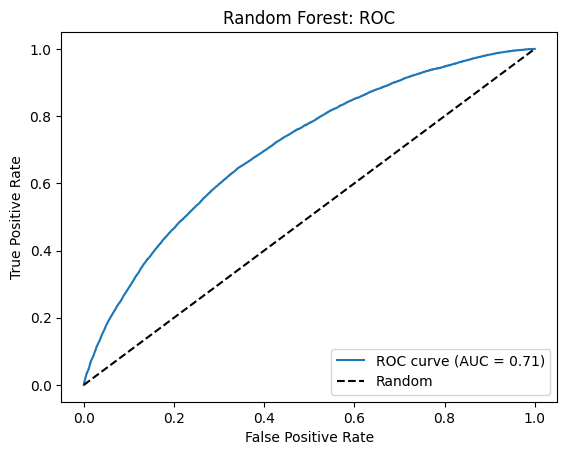

In [100]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities
pred_probability = rf2.predict_proba(X_valid[selected_cols])

# calculating true positive rate, false positive rate and thresholds for the ROC curve
fpr,tpr,threshold = roc_curve(y_valid, pred_probability[:,1],pos_label=1)
#calculating auc score
auc_score = roc_auc_score(y_valid, pred_probability[:,1])

# creating random baseline where the classifier has no predictive power and would result in a diagonal line from (0,0) to (1,1)
random_probs = [0 for i in range(len(y_valid))]
p_fpr, p_tpr, _ = roc_curve(y_valid, random_probs, pos_label=1)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot(p_fpr, p_tpr, 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest: ROC')
plt.legend(loc='lower right')
plt.show()

## Model 2.3: Logistic Regression with feature slection

In [102]:
lr5=LogisticRegression(random_state=42,max_iter=1000, solver='liblinear', class_weight={0:1, 1:5})
lr5.fit(X_train_scaled[selected_cols],y_train)

LogisticRegression(class_weight={0: 1, 1: 5}, max_iter=1000, random_state=42,
                   solver='liblinear')

It was observed even without l2 penalty and only 'balanced' class weight, the model performed very similar to the results we have gotten for this model.

In [103]:
#predicting labels and probabilities
y_train_pred=lr5.predict(X_train_scaled[selected_cols])
#train_pred_prob=lr2.predict_proba(X_train_scaled)

In [104]:
# printing classification report for tarining set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.47      0.62    139199
           1       0.30      0.80      0.44     39511

    accuracy                           0.54    178710
   macro avg       0.60      0.64      0.53    178710
weighted avg       0.76      0.54      0.58    178710



In [105]:
#predicting test data
y_val_pred=lr5.predict(X_valid_scaled[selected_cols])
print(classification_report(y_valid,y_val_pred))

              precision    recall  f1-score   support

           0       0.89      0.47      0.62     59566
           1       0.30      0.80      0.44     17024

    accuracy                           0.55     76590
   macro avg       0.60      0.64      0.53     76590
weighted avg       0.76      0.55      0.58     76590



Feature selection is not making much difference in model performance. Logistic model with the same weights gave the same results.

## Model 2.4 LightGBM classifier with GridSearchCV

In [106]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


lgb_classifier = lgb.LGBMClassifier()
lgb_classifier.fit(X_train, y_train)
feature_importances = lgb_classifier.feature_importances_


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39511, number of negative: 139199
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 178710, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221090 -> initscore=-1.259325
[LightGBM] [Info] Start training from score -1.259325


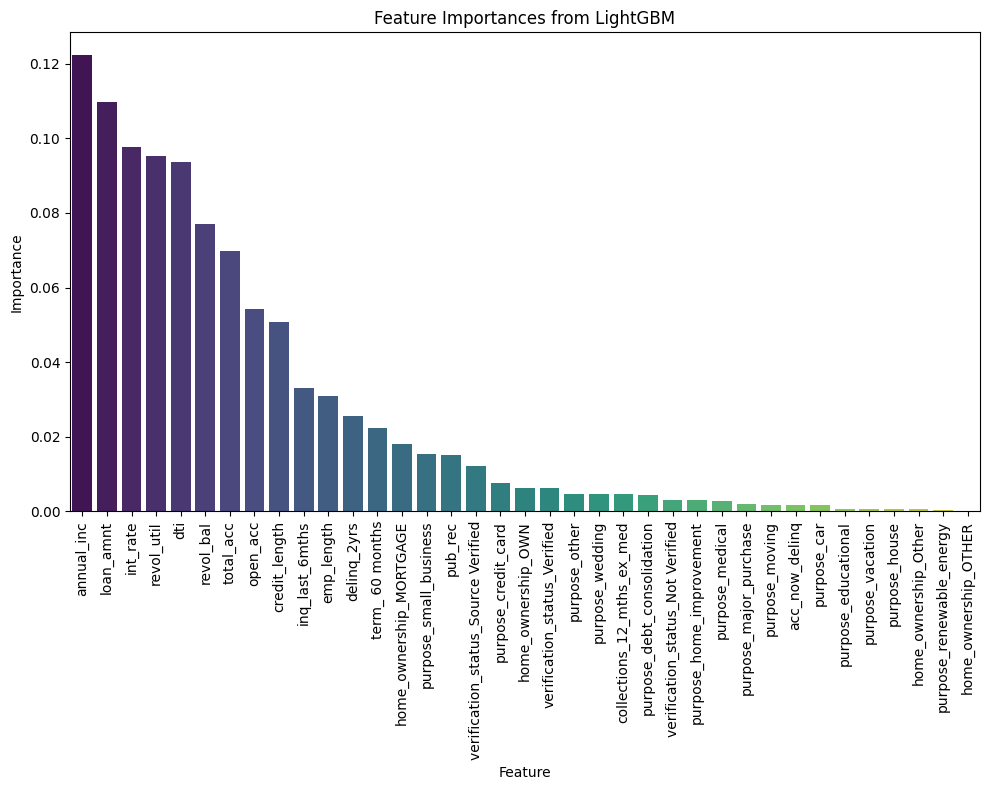

In [107]:
# Get feature importances
feature_importances = lgb_classifier.feature_importances_

# Calculate sum of feature importances
total_importance = sum(feature_importances)

# Normalize feature importances to get scaled feature importance
scaled_importances = feature_importances / total_importance

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns.to_list(),
                              'Importance': scaled_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances using Seaborn

# visualization
# fig, ax = plt.subplots(figsize=(10, 8))
# sns.barplot(x='scaled_importance', y='variable', data=h2o_rf_importance[:15], ax=ax)
# ax.set_title('LightGBM Random Forest Feature Importance', fontsize=16)
# ax.set_xlabel('Relative Importance', fontsize=12)
# ax.set_ylabel('')
# ax.grid(True)
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(10, 8))  # Set the figure size (adjust as needed)
sns.barplot(data=importance_df, x='Feature', y='Importance', palette='viridis')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances from LightGBM')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

Annual income, loan amount, interest rate are the top three predictors according to lightgbm feature selector. The most important features given by lightgbm are similar to the K-Best results we obtained earlier

In [159]:
# performing GridSearchCV using LightGBM

from sklearn.model_selection import ParameterGrid

param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63],
    'n_estimators': [50, 100, 200],
}


# Initialize the LightGBM model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'device': 'cpu',
}

lgb2 = lgb.LGBMClassifier(**params)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=lgb2,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_valid, y_valid)

print(f'Test accuracy: {test_score:.4f}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39511, number of negative: 139199
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 178710, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221090 -> initscore=-1.259325
[LightGBM] [Info] Start training from score -1.259325
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [160]:
best_model

LGBMClassifier(device='cpu', max_depth=5, metric='binary_logloss',
               num_leaves=63, objective='binary')

In [161]:
# Get predicted labels
y_valid_pred = best_model.predict(X_valid)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_valid_pred)

In [162]:
#predicting test data
print(classification_report(y_valid,y_valid_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88     59566
           1       0.56      0.09      0.15     17024

    accuracy                           0.78     76590
   macro avg       0.68      0.53      0.51     76590
weighted avg       0.74      0.78      0.71     76590



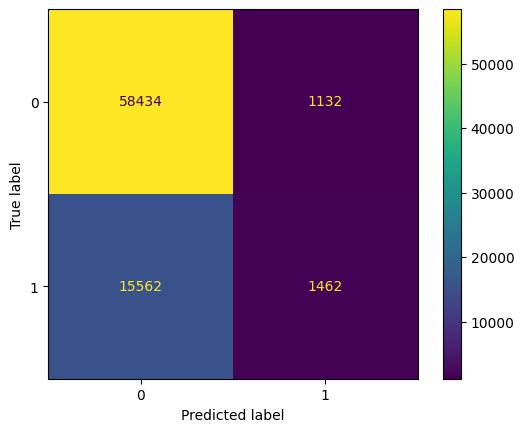

In [163]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [113]:
y_pred_prob = best_model.predict_proba(X_valid)[:, 1]  # Get predicted probabilities for the positive class

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_valid, y_pred_prob)

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7135562370957255


Model has poor recall and F-1 as compared to logistic regression model or random forest built so far.

## Model 2.4: LightGBM+Balanced class weight

In [164]:
# performing GridSearchCV using LightGBM

from sklearn.model_selection import ParameterGrid

param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63],
    'n_estimators': [50, 100, 200],

}

# Initialize the LightGBM model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'device': 'cpu',
    'class_weight':'balanced'
}

lgb_model = lgb.LGBMClassifier(**params)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_valid, y_valid)

print(f'Test accuracy: {test_score:.4f}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39511, number of negative: 139199
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 178710, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [165]:
best_model

LGBMClassifier(class_weight='balanced', device='cpu', max_depth=7,
               metric='binary_logloss', n_estimators=200, num_leaves=63,
               objective='binary')

In [166]:
# Get predicted labels
y_valid_pred = best_model.predict(X_valid)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_valid_pred)

In [167]:
#predicting test data
print(classification_report(y_valid,y_valid_pred))

              precision    recall  f1-score   support

           0       0.87      0.67      0.76     59566
           1       0.36      0.64      0.46     17024

    accuracy                           0.66     76590
   macro avg       0.61      0.65      0.61     76590
weighted avg       0.75      0.66      0.69     76590



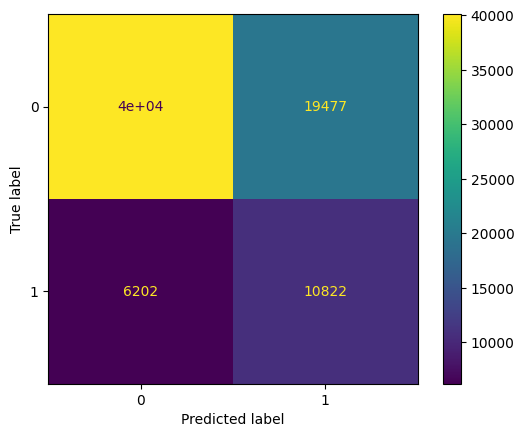

In [168]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [169]:
y_pred_prob = best_model.predict_proba(X_valid)[:, 1]  # Get predicted probabilities for the positive class

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_valid, y_pred_prob)

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7134485418840388


 # SMOTE Oversampling: Logistic, Random Forest and LightGBM

In [116]:
#resample the data using SMOTE oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

## Model 3.1 Logistic Regression with oversampling

In [117]:
lr6=LogisticRegression(random_state=42,max_iter=1000, solver='liblinear', penalty='l2')

#rescaling the resampled
# Select numeric columns from the original DataFrame
numeric_data = df_final[numeric_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the numeric data. We use resampled data only for train and not for validation set
X_train_transform = scaler.fit_transform(X_train_res[numeric_columns])
X_valid_transform = scaler.transform(X_valid[numeric_columns])

#Create DataFrames with the scaled data and the same column names
X_train_scaled = pd.DataFrame(X_train_transform , columns=numeric_columns,index=X_train_res.index)
X_valid_scaled = pd.DataFrame(X_valid_transform , columns=numeric_columns,index=X_valid.index)

# Concatenate the scaled numeric data with non-numeric columns for train and test DataFrames
train_non_numeric_columns =X_train_res.drop(columns=numeric_columns, axis=1)
test_non_numeric_columns = X_valid.drop(columns=numeric_columns, axis=1)

X_train_scaled = pd.concat([train_non_numeric_columns, X_train_scaled], axis=1)
X_valid_scaled = pd.concat([test_non_numeric_columns, X_valid_scaled], axis=1)

# Fit the model on the training data
lr6.fit(X_train_scaled, y_train_res)

# Predict on the validation data
y_val_pred=lr6.predict(X_valid_scaled)
print(classification_report(y_valid,y_val_pred))
print(f'auc score: {roc_auc_score(y_valid, y_val_pred)}')

              precision    recall  f1-score   support

           0       0.86      0.66      0.75     59566
           1       0.35      0.64      0.45     17024

    accuracy                           0.65     76590
   macro avg       0.61      0.65      0.60     76590
weighted avg       0.75      0.65      0.68     76590

auc score: 0.6473413279535886


Precision is slightly higher(by 0.05) but recall is lower(by 0.15) compared to model with class_weight. Over all auc is also is lower by 0.06 for this model.

## Model 3.2 Logistic + SMOTE + StratifiedKFold

In [118]:
#k-fold cross validation for logistic reg + smote oversampling

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline


# Number of folds for cross-validation
n_splits = 5

# Initialize the StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store recall and F1-score values
recall_scores = []
precision_scores = []
auc=[]

# Define a pipeline with scaling and logistic regression which does scaling at each fold automatically
lr7 = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(random_state=42,max_iter=1000, solver='liblinear', penalty='l2'))  # Logistic Regression
])

# Perform stratified k-fold cross-validation
for train_index, valid_index in stratified_kfold.split(X_train, y_train):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    #resample the data using SMOTE oversampling
    sm = SMOTE(random_state = 2)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    # Fit the model on the training data
    lr7.fit(X_train_res, y_train_res)

    # Predict on the validation data
    y_pred = lr7.predict(X_valid)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel()

    # Calculate recall and precision for positive class
    recall_positive = tp / (tp + fn)
    precision_positive = tp / (tp + fp)

    recall_scores.append(recall_positive)
    precision_scores.append(precision_positive)

    auc_score = roc_auc_score(y_valid, y_pred)
    auc.append(auc_score)


# Calculate the mean and standard deviation of recall and F1-score values
mean_recall = sum(recall_scores) / n_splits
std_recall = np.std(recall_scores)

mean_f1 = sum(f1_scores) / n_splits
std_f1 = np.std(f1_scores)

mean_auc = sum(auc) / n_splits
std_auc = np.std(auc)

print(f'Mean Recall: {mean_recall:.4f}')
print(f'Standard Deviation (Recall): {std_recall:.4f}')

print(f'Mean F1-score: {mean_f1:.4f}')
print(f'Standard Deviation (F1-score): {std_f1:.4f}')


print(f'AUC Score: {auc_score:.4f}')
print(f'Standard Deviation(AUC Score): {std_auc:.4f}')

Mean Recall: 0.6319
Standard Deviation (Recall): 0.0010
Mean F1-score: 0.0000
Standard Deviation (F1-score): nan
AUC Score: 0.6497
Standard Deviation(AUC Score): 0.0026


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


## Model 3.3 Light GBM with over sampling

In [119]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 2)
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [120]:
# y_train_res.value_counts()

In [121]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Define the parameter space to explore
param_dist = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': sp_randint(5, 15),  # Random integer values between 5 and 15
    'num_leaves': sp_randint(15, 50),  # Random integer values between 15 and 49
    'n_estimators': sp_randint(50, 200),  # Random integer values between 50 and 199
}

# Initialize the LightGBM model
lgb_classifier = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', random_state=42)

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=lgb_classifier,
    param_distributions=param_dist,
    n_iter=30,  # Number of random combinations to try
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Number of CPU cores to use in parallel (-1 for all available cores)
    scoring='roc_auc',  # Evaluation metric
    random_state=42,
)

# Perform random search
random_search.fit(X_train_res, y_train_res)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best ROC-AUC Score: {best_score:.4f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 114032, number of negative: 114032
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8282
[LightGBM] [Info] Number of data points in the train set: 228064, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 99, 'num_leaves': 18}
Best ROC-AUC Score: 0.9020


In [122]:
# Train the best model on the entire training dataset
best_model.fit(X_train, y_train)

# Get predicted labels
y_valid_pred = best_model.predict(X_valid)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_valid_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28936, number of negative: 114032
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1805
[LightGBM] [Info] Number of data points in the train set: 142968, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202395 -> initscore=-1.371393
[LightGBM] [Info] Start training from score -1.371393


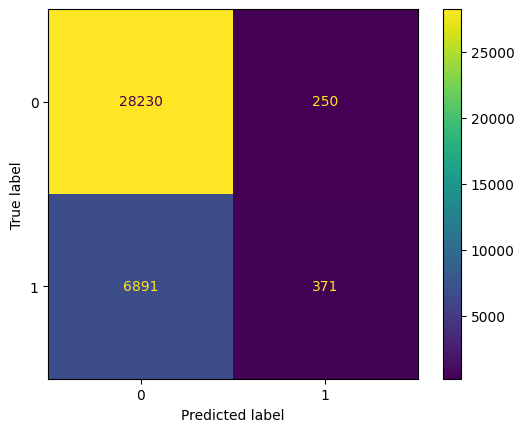

In [123]:
ConfusionMatrixDisplay(conf_matrix).plot()

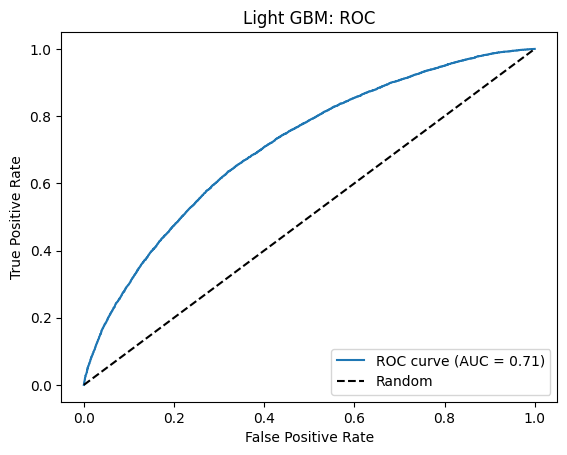

In [124]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities
pred_probability = best_model.predict_proba(X_valid)

# calculating true positive rate, false positive rate and thresholds for the ROC curve
fpr,tpr,threshold = roc_curve(y_valid, pred_probability[:,1],pos_label=1)
#calculating auc score
auc_score = roc_auc_score(y_valid, pred_probability[:,1])

# creating random baseline where the classifier has no predictive power and would result in a diagonal line from (0,0) to (1,1)
random_probs = [0 for i in range(len(y_valid))]
p_fpr, p_tpr, _ = roc_curve(y_valid, random_probs, pos_label=1)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot(p_fpr, p_tpr, 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Light GBM: ROC')
plt.legend(loc='lower right')
plt.show()

## Model 3.4 Random Forest with SMOTE

In [125]:
rf = RandomForestClassifier(n_estimators=100, random_state=1,bootstrap= True, max_features = 'sqrt', max_depth=10, class_weight='balanced')
rf.fit(X_train_res, y_train_res)

# variable (feature) importance plot
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
df_rf = pd.DataFrame({'feature': X_train_res.columns, 'importance': importances, 'std': std})
df_rf = df_rf.sort_values('importance')
print(df_rf)

                                feature  importance       std
36                 home_ownership_Other    0.000010  0.000030
34                 home_ownership_OTHER    0.000020  0.000035
25             purpose_renewable_energy    0.000026  0.000039
18                  purpose_educational    0.000068  0.000146
20                        purpose_house    0.000092  0.000098
13                       acc_now_delinq    0.000094  0.000101
12           collections_12_mths_ex_med    0.000105  0.000098
27                     purpose_vacation    0.000151  0.000185
28                      purpose_wedding    0.000166  0.000281
23                       purpose_moving    0.000199  0.000340
22                      purpose_medical    0.000431  0.000632
15                          purpose_car    0.000551  0.000879
14                        credit_length    0.001563  0.000568
21               purpose_major_purchase    0.001578  0.002472
11                            total_acc    0.002173  0.001437
26      

In [126]:
df_final.shape

(255300, 38)

In [127]:
#getting test and train predicted values
y_train_pred=rf.predict(X_train_res)
y_val_pred=rf.predict(X_valid)

In [128]:
# printing classification report for tarining set
print(classification_report(y_train_res,y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87    114032
           1       0.94      0.76      0.84    114032

    accuracy                           0.86    228064
   macro avg       0.87      0.86      0.86    228064
weighted avg       0.87      0.86      0.86    228064



In [129]:
#predicting test data
print(classification_report(y_valid,y_val_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     28480
           1       0.45      0.15      0.23      7262

    accuracy                           0.79     35742
   macro avg       0.63      0.55      0.55     35742
weighted avg       0.74      0.79      0.75     35742



In [130]:
# confusion matrix for validation set
cm_train = confusion_matrix(y_train_res, y_train_pred)
cm_valid = confusion_matrix(y_valid, y_val_pred)

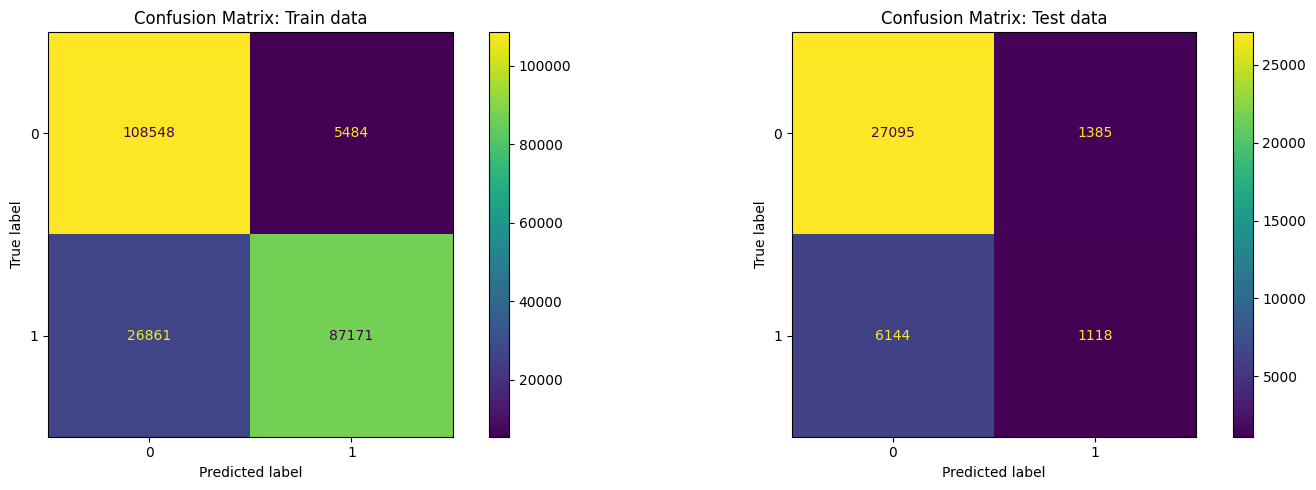

In [131]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plotting the train confusion matrix on the left subplot
axs[0].set_title('Confusion Matrix: Train data')
ConfusionMatrixDisplay(cm_train, display_labels=rf.classes_).plot(ax=axs[0])

# Plotting the test confusion matrix on the right subplot
axs[1].set_title('Confusion Matrix: Test data')
ConfusionMatrixDisplay(cm_valid, display_labels=rf.classes_).plot(ax=axs[1])

plt.tight_layout()
plt.show()

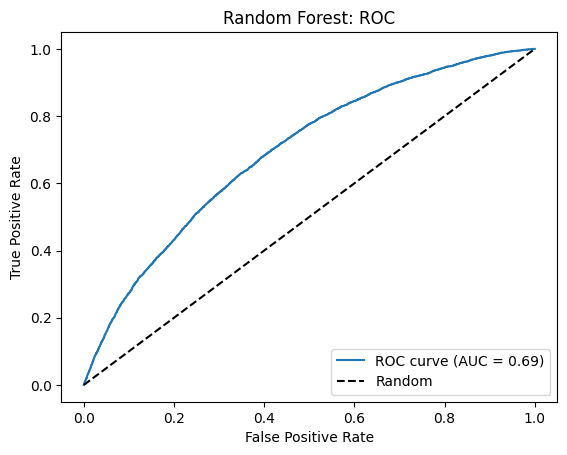

In [132]:
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities
pred_probability = rf.predict_proba(X_valid)

# calculating true positive rate, false positive rate and thresholds for the ROC curve
fpr,tpr,threshold = roc_curve(y_valid, pred_probability[:,1],pos_label=1)
#calculating auc score
auc_score = roc_auc_score(y_valid, pred_probability[:,1])

# creating random baseline where the classifier has no predictive power and would result in a diagonal line from (0,0) to (1,1)
random_probs = [0 for i in range(len(y_valid))]
p_fpr, p_tpr, _ = roc_curve(y_valid, random_probs, pos_label=1)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot(p_fpr, p_tpr, 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest: ROC')
plt.legend(loc='lower right')
plt.show()

# Model 3 Random Forest with hyperparameter tuning

Hyper parameter tuning uisng GridSearchCV to avoid overfitting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
import numpy as np

# Assuming X_train and y_train are your training data
# Assuming features is a list of feature column names

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [25],
    'max_features': ['sqrt'],
    'min_samples_split': [5, 10],
    'bootstrap': [True]
}

# Initialize GridSearchCV with Random Forest model and hyperparameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='roc_auc', cv=5)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best AUC
best_params = grid_search.best_params_
best_auc = grid_search.best_score_

print('Best hyperparameters:', best_params)
print('Best AUC:', best_auc)

KeyboardInterrupt: ignored